# Applied Industrial System Analytics Project

# Group 19

In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
%matplotlib inline
import datetime

In [2]:
#reading the file
data = pd.read_excel("UVAQA0864X.xlsx", sheet_name='Exhibit 1 -- Data')
data.shape

(2392, 56)

In [3]:
data

ID Program.Code  \
0                                                     1           HS   
1                                                     2           HC   
2                                                     3           HD   
3                                                     4           HN   
4                                                     5           HD   
...                                                 ...          ...   
2387                                               2388           HS   
2388                                               2389           HD   
2389                                                NaN          NaN   
2390                                                NaN          NaN   
2391  Data source: Company data adjusted by author u...          NaN   

      From.Grade  To.Grade Group.State  Is.Non.Annual.  Days Travel.Type  \
0            4.0       4.0          CA             0.0   1.0           A   
1            8.0       8.0          AZ             0.0   7.0           A   
2            8.0       8.0          FL             0.0   3.0           A   
3            9.0      12.0          VA             1.0   3.0           B   
4            6.0       8.0          FL             0.0   6.0           T   
...          ...       ...         ...             ...   ...         ...   
2387         4.0       4.0          CA             0.0   1.0           A   
2388         8.0       8.0          WA             0.0   6.0           A   
2389         NaN       NaN         NaN             NaN   NaN         NaN   
2390         NaN       NaN         NaN             NaN   NaN         NaN   
2391         NaN       NaN         NaN             NaN   NaN         NaN   

     Departure.Date Return.Date  ... GroupGradeTypeLow GroupGradeTypeHigh  \
0        2011-01-14  2011-01-14  ...                 K         Elementary   
1        2011-01-14  2011-01-21  ...            Middle             Middle   
2        2011-01-15  2011-01-17  ...            Middle             Middle   
3        2011-01-15  2011-01-17  ...         Undefined          Undefined   
4        2011-01-16  2011-01-21  ...            Middle             Middle   
...             ...         ...  ...               ...                ...   
2387     2011-06-30  2011-06-30  ...         Undefined          Undefined   
2388     2011-06-30  2011-07-05  ...            Middle             Middle   
2389            NaT         NaT  ...               NaN                NaN   
2390            NaT         NaT  ...               NaN                NaN   
2391            NaT         NaT  ...               NaN                NaN   

            GroupGradeType  MajorProgramCode  SingleGradeTripFlag  \
0            K->Elementary                 H                  1.0   
1           Middle->Middle                 H                  1.0   
2           Middle->Middle                 H                  1.0   
3     Undefined->Undefined                 H                  0.0   
4           Middle->Middle                 H                  0.0   
...                    ...               ...                  ...   
2387  Undefined->Undefined                 H                  1.0   
2388        Middle->Middle                 H                  1.0   
2389                   NaN               NaN                  NaN   
2390                   NaN               NaN                  NaN   
2391                   NaN               NaN                  NaN   

      FPP.to.School.enrollment FPP.to.PAX Num.of.Non_FPP.PAX  \
0                     0.063646   0.936508                4.0   
1                     0.025882   0.880000                3.0   
2                     0.025131   0.888889                3.0   
3                          NaN   1.000000                0.0   
4                     0.112500   0.910112                8.0   
...                        ...        ...                ...   
2387                       NaN   0.941176                1.0   
2388     

## Data Preprocessing 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2390 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

In [5]:
data.isnull().sum()

ID                                   2
Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag      

In [6]:
data.keys()

Index(['ID', 'Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Departure.Date',
       'Return.Date', 'Deposit.Date', 'Special.Pay', 'Tuition', 'FRP.Active',
       'FRP.Cancelled', 'FRP.Take.up.percent.', 'Early.RPL', 'Latest.RPL',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Initial.System.Date',
       'Poverty.Code', 'Region', 'CRM.Segment', 'School.Type',
       'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing', 'FPP',
       'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', '

In [7]:
data['Program.Code'].unique()

array(['HS', 'HC', 'HD', 'HN', 'SG', 'FN', 'CC', 'CD', 'HVP', 'SM', 'HG',
       'HP', 'SK', 'HW', 'SC', 'IC', 'HY', 'CVP', 'HF', 'ST', 'HZ', 'CN',
       'HO', 'HX', 'HIS', 'SD', 'HH', 'IK', nan], dtype=object)

In [8]:
data['From.Grade'].unique()

array([ 4.,  8.,  9.,  6., 10., 11.,  5.,  7., nan, 12.,  3.])

In [9]:
data['To.Grade'].unique()

array([ 4.,  8., 12.,  9.,  5.,  7., nan,  6., 10., 11.,  3.])

In [10]:
data['Group.State'].unique()

array(['CA', 'AZ', 'FL', 'VA', 'LA', 'MA', 'MX', 'TX', 'IA', 'MI', 'NY',
       'NC', 'OH', 'MN', 'AR', 'IL', 'IN', 'WI', 'MO', 'ID', 'TN', 'KS',
       'AL', 'MS', 'KY', 'OR', 'NE', 'CO', 'SC', 'NM', 'HI', 'OK', 'AK',
       'GA', 'NJ', 'WA', 'NV', 'RI', 'MT', 'CT', 'Cayman Islands', 'PR',
       'UT', 'PA', 'ME', 'MD', 'VT', 'NH', 'AB', 'Bermuda', 'WV', 'SD',
       'ND', 'WY', nan], dtype=object)

In [11]:
data['Travel.Type'].unique()

array(['A', 'B', 'T', 'N', nan], dtype=object)

In [12]:
data['Special.Pay'].unique()

array([nan, 'CP', 'FR', 'SA'], dtype=object)

In [13]:
data['Tuition'].unique()

array([ 424., 2350., 1181., ..., 2650., 2135.,   nan])

In [14]:
data['FRP.Active'].unique()

array([ 25.,   9.,  17.,   0.,  40.,  16.,  10.,  30.,  51.,  47.,  32.,
        20.,  21.,  22.,   5.,  33.,  34.,  13.,  56.,  19.,  15.,  53.,
        50.,  27.,  39.,  78.,  12.,  28.,  72.,  37.,  97.,  43.,  14.,
        36.,  18.,  31.,   4.,   2.,   8.,  70.,  44.,  11.,  46.,  38.,
        94.,  65.,  88.,   1.,  41.,   3.,  26.,  58.,   6., 149.,  42.,
        49.,  24.,  23.,   7.,  54.,  45.,  29.,  35.,  64.,  81.,  57.,
        73., 257.,  83., 104.,  85.,  55.,  48., 116.,  61.,  71.,  67.,
        66.,  52., 124.,  68.,  74., 139., 101., 160., 108.,  59.,  86.,
        62., 115.,  93.,  80.,  75.,  nan])

In [15]:
data['FRP.Cancelled'].unique()

array([ 3.,  9.,  6.,  0.,  8.,  4.,  1.,  2.,  5., 13., 30.,  7., 10.,
       11., 18., 12., 22., 15., 14., 17., 32., 20., 23., 16., 19., 28.,
       45., 27., 26., nan])

In [16]:
data['Poverty.Code'].unique()

array(['B', 'C', nan, 'D', 'A', 'E', 0], dtype=object)

In [17]:
data['Region'].unique()

array(['Southern California', 'Other', 'Houston', 'Northern California',
       'Dallas', 'Pacific Northwest', nan], dtype=object)

In [18]:
data['School.Type'].unique()

array(['PUBLIC', 'CHD', 'Catholic', 'Private non-Christian', nan],
      dtype=object)

In [19]:
data['MDR.Low.Grade'].unique()

array(['K', 7, 6, nan, 10, 9, 'PK', 5, 3, 2, 1, 4, 8], dtype=object)

In [20]:
data['MDR.High.Grade'].unique()

array([ 5.,  8., nan, 12.,  7.,  6.,  9.,  4.,  1., 11., 10.,  3.,  2.])

In [21]:
data['Total.School.Enrollment'].unique()

array([ 927.,  850.,  955.,   nan,  720.,  939.,  225.,  500.,  635.,
        746.,  650.,  670.,  750.,  753.,  626.,  467.,  360.,  345.,
        664., 1693.,  760.,  641.,  700., 1300.,  685.,  702.,  698.,
        604.,  597.,  320.,  794.,  966.,  321., 2393.,  783.,  430.,
        562.,  522.,  364.,  351., 1306., 1008.,  652.,  240.,  880.,
        565., 1325.,  412.,  824.,  230., 1023., 1688.,  200., 1555.,
        400.,  280., 1232.,  478.,  669.,  495.,  586.,  900.,  835.,
        996.,  497.,  310.,  550.,  610.,  864.,  365.,  511.,  372.,
        375.,  682., 2159., 1100.,  428.,  552.,  688.,  330.,  315.,
        468.,  957., 1102.,  780.,  570.,  350., 1140., 1165.,  452.,
       1590.,  184.,  165., 1450.,  995.,  923., 1249.,  547., 1266.,
        675.,  919.,  875.,  638., 1318.,  743.,  220.,  429.,  509.,
        717., 1514.,  239.,  947., 1077.,  625.,  449.,  740., 1305.,
       1032.,  767., 1360.,  487.,  475.,  772.,  789., 1792.,  895.,
        172.,  642.,

In [22]:
data['Income.Level'].unique()

array(['Q', 'A', 'O', nan, 'C', 'I', 'G', 'K', 'L', 'P5', 'N', 'H', 'E',
       'M', 'P', 'P1', 'J', 'P3', 'Z', 'B', 'F', 'D', 'P4'], dtype=object)

In [23]:
data['SPR.Product.Type'].unique()

array(['CA History', 'East Coast', 'Science', 'Costa Rica',
       'International', 'IL History', nan], dtype=object)

In [24]:
data['SPR.New.Existing'].unique()

array(['EXISTING', 'NEW', nan], dtype=object)

In [25]:
data['SchoolGradeTypeLow'].unique()

array(['Elementary', 'Middle', 'High', 'Undefined', nan], dtype=object)

In [26]:
data['SchoolGradeTypeHigh'].unique()

array(['Elementary', 'Middle', 'High', 'Undefined', nan], dtype=object)

In [27]:
data['SchoolGradeType'].unique()

array(['Elementary->Elementary', 'Middle->Middle', 'High->High',
       'Undefined->Undefined', 'Middle->Undefined', 'Elementary->Middle',
       'Middle->High', 'Elementary->High', 'Elementary->Undefined', nan],
      dtype=object)

In [28]:
data['DepartureMonth'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', nan],
      dtype=object)

In [29]:
data['GroupGradeTypeLow'].unique()

array(['K', 'Middle', 'Undefined', 'High', 'PK', 'Elementary', nan],
      dtype=object)

In [30]:
data['GroupGradeTypeHigh'].unique()

array(['Elementary', 'Middle', 'Undefined', 'High', nan], dtype=object)

In [31]:
data['GroupGradeType'].unique()

array(['K->Elementary', 'Middle->Middle', 'Undefined->Undefined',
       'High->High', 'Middle->High', 'PK->Middle', 'K->High',
       'Elementary->Middle', 'PK->High', 'K->Middle',
       'Elementary->Elementary', 'PK->Elementary', 'Elementary->High',
       nan], dtype=object)

In [32]:
data['MajorProgramCode'].unique()

array(['H', 'S', 'I', 'C', nan], dtype=object)

In [33]:
data['SchoolSizeIndicator'].unique()

array(['L', nan, 'M-L', 'S', 'S-M'], dtype=object)

### Correlation

In [34]:
data.corr()

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


From.Grade  To.Grade  Is.Non.Annual.  \
From.Grade                        1.000000  0.779775       -0.107391   
To.Grade                          0.779775  1.000000        0.092553   
Is.Non.Annual.                   -0.107391  0.092553        1.000000   
Days                              0.402515  0.440916        0.019720   
Tuition                           0.313262  0.414692        0.056052   
FRP.Active                        0.094622 -0.063830       -0.033359   
FRP.Cancelled                     0.076536  0.029503       -0.009289   
FRP.Take.up.percent.              0.133030  0.154540        0.061712   
Cancelled.Pax                     0.062403  0.048955       -0.020190   
Total.Discount.Pax                0.151813  0.014050       -0.060039   
CRM.Segment                       0.246724  0.232147        0.039884   
Parent.Meeting.Flag               0.127055  0.143847        0.043010   
MDR.High.Grade                    0.487057  0.581006        0.046171   
Total.School.Enrollment           0.186064  0.161579       -0.134376   
EZ.Pay.Take.Up.Rate               0.055754  0.055798        0.061965   
School.Sponsor                   -0.315270 -0.370151       -0.003663   
FPP                               0.031089 -0.140358       -0.072195   
Total.Pax                         0.042538 -0.128152       -0.072043   
SPR.Group.Revenue                 0.313262  0.414692        0.056052   
NumberOfMeetingswithParents       0.089202  0.134745        0.063371   
DifferenceTraveltoFirstMeeting   -0.032032  0.046226        0.111056   
DifferenceTraveltoLastMeeting    -0.040250  0.028065        0.064330   
SingleGradeTripFlag               0.196779 -0.322935       -0.352164   
FPP.to.School.enrollment         -0.062839 -0.107073        0.075935   
FPP.to.PAX                       -0.122717 -0.246170        0.020026   
Num.of.Non_FPP.PAX                0.151813  0.014050       -0.060039   
Retained.in.2012.                 0.083220 -0.200470       -0.390633   

                                    Days   Tuition  FRP.Active  FRP.Cancelled  \
From.Grade                      0.402515  0.313262    0.094622       0.076536   
To.Grade                        0.440916  0.414692   -0.063830       0.029503   
Is.Non.Annual.                  0.019720  0.056052   -0.033359      -0.009289   
Days                            1.000000  0.772086   -0.037300       0.058620   
Tuition                         0.772086  1.000000   -0.225533      -0.007369   
FRP.Active                     -0.037300 -0.225533    1.000000       0.463491   
FRP.Cancelled                   0.058620 -0.007369    0.463491       1.000000   
FRP.Take.up.percent.            0.069282  0.175085    0.269307       0.180026   
Cancelled.Pax                   0.052793 -0.026192    0.383178       0.850347   
Total.Discount.Pax             -0.001338 -0.218439    0.698390       0.323035   
CRM.Segment                    -0.018599 -0.073536    0.027741       0.038990   
Parent.Meeting.Flag             0.142625  0.157659    0.068607       0.132144   
MDR.High.Grade                  0.242661  0.178791   -0.013089      -0.039826   
Total.School.Enrollment         0.135481  0.147744    0.091351       0.133532   
EZ.Pay.Take.Up.Rate             0.066963  0.098941    0.108399       0.107432   
School.Sponsor                 -0.222797 -0.246801    0.078897      -0.032677   
FPP                            -0.116036 -0.364922    0.815323       0.341100   
Total.Pax                      -0.107127 -0.356411    0.815460       0.343967   
SPR.Group.Revenue               0.772086  1.000000   -0.225533      -0.007369   
NumberOfMeetingswithParents     0.127983  0.153833    0.000334       0.107907   
DifferenceTraveltoFirstMeeting  0.088838  0.130842   -0.120211       0.029818   
DifferenceTraveltoLastMeeting   0.053798  0.102268   -0.105919       0.027411   
SingleGradeTripFlag            -0.117656 -0.179277    0.213394       0.059500   
FPP.to.School.enrollment       -0.109527 -0.277246    0.393675       0.

In [35]:
cor=data.corr().abs()
plt.figure(figsize=(25,15))
sns.heatmap(cor,annot=True, annot_kws={'size':15})

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\439919143.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr().abs()


<AxesSubplot:>

In [36]:
upper_tri = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))
print(upper_tri)

                                From.Grade  To.Grade  Is.Non.Annual.  \
From.Grade                             NaN  0.779775        0.107391   
To.Grade                               NaN       NaN        0.092553   
Is.Non.Annual.                         NaN       NaN             NaN   
Days                                   NaN       NaN             NaN   
Tuition                                NaN       NaN             NaN   
FRP.Active                             NaN       NaN             NaN   
FRP.Cancelled                          NaN       NaN             NaN   
FRP.Take.up.percent.                   NaN       NaN             NaN   
Cancelled.Pax                          NaN       NaN             NaN   
Total.Discount.Pax                     NaN       NaN             NaN   
CRM.Segment                            NaN       NaN             NaN   
Parent.Meeting.Flag                    NaN       NaN             NaN   
MDR.High.Grade                         NaN       NaN            

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\1400045538.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))


Dropping Columns having correlation greater than 0.6

In [37]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]
print(); print(to_drop)


['To.Grade', 'Tuition', 'Cancelled.Pax', 'Total.Discount.Pax', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'Num.of.Non_FPP.PAX']


In [38]:
df = data.drop(columns=['To.Grade', 'Tuition', 'Cancelled.Pax', 'Total.Discount.Pax', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'Num.of.Non_FPP.PAX'], axis=1)

In [39]:
df

ID Program.Code  \
0                                                     1           HS   
1                                                     2           HC   
2                                                     3           HD   
3                                                     4           HN   
4                                                     5           HD   
...                                                 ...          ...   
2387                                               2388           HS   
2388                                               2389           HD   
2389                                                NaN          NaN   
2390                                                NaN          NaN   
2391  Data source: Company data adjusted by author u...          NaN   

      From.Grade Group.State  Is.Non.Annual.  Days Travel.Type Departure.Date  \
0            4.0          CA             0.0   1.0           A     2011-01-14   
1            8.0          AZ             0.0   7.0           A     2011-01-14   
2            8.0          FL             0.0   3.0           A     2011-01-15   
3            9.0          VA             1.0   3.0           B     2011-01-15   
4            6.0          FL             0.0   6.0           T     2011-01-16   
...          ...         ...             ...   ...         ...            ...   
2387         4.0          CA             0.0   1.0           A     2011-06-30   
2388         8.0          WA             0.0   6.0           A     2011-06-30   
2389         NaN         NaN             NaN   NaN         NaN            NaT   
2390         NaN         NaN             NaN   NaN         NaN            NaT   
2391         NaN         NaN             NaN   NaN         NaN            NaT   

     Return.Date Deposit.Date  ... DepartureMonth  GroupGradeTypeLow  \
0     2011-01-14   2010-08-30  ...        January                  K   
1     2011-01-21   2009-11-15  ...        January             Middle   
2     2011-01-17   2010-10-15  ...        January             Middle   
3     2011-01-17   2011-01-07  ...        January          Undefined   
4     2011-01-21   2010-09-30  ...        January             Middle   
...          ...          ...  ...            ...                ...   
2387  2011-06-30   2010-12-17  ...           June          Undefined   
2388  2011-07-05   2010-10-29  ...           June             Middle   
2389         NaT          NaT  ...            NaN                NaN   
2390         NaT          NaT  ...            NaN                NaN   
2391         NaT          NaT  ...            NaN                NaN   

      GroupGradeTypeHigh        GroupGradeType MajorProgramCode  \
0             Elementary         K->Elementary                H   
1                 Middle        Middle->Middle                H   
2                 Middle        Middle->Middle                H   
3              Undefined  Undefined->Undefined                H   
4                 Middle        Middle->Middle                H   
...                  ...                   ...              ...   
2387           Undefined  Undefined->Undefined                H   
2388              Middle        Middle->Middle                H   
2389                 NaN                   NaN              NaN   
2390                 NaN                   NaN              NaN   
2391                 NaN                   NaN              NaN   

     SingleGradeTripFlag FPP.to.School.enrollment FPP.to.PAX  \
0                    1.0                 0.063646   0.936508   
1                    1.0                 0.025882   0.880000   
2                    1.0                 0.025131   0.888889   
3                    0.0                      NaN   1.000000   
4                    0.0                 0.112500   0.910112   
...                  ...                      ...        ...   
2387                 1.0                      NaN   0.941176   
2388                 1.0         

Correlation matrix for columns having correlation less than 0.6

In [40]:
cor=df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(cor,annot=True, annot_kws={'size':15})

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3044893042.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


<AxesSubplot:>

In [41]:
df.keys()

Index(['ID', 'Program.Code', 'From.Grade', 'Group.State', 'Is.Non.Annual.',
       'Days', 'Travel.Type', 'Departure.Date', 'Return.Date', 'Deposit.Date',
       'Special.Pay', 'FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.',
       'Early.RPL', 'Latest.RPL', 'Initial.System.Date', 'Poverty.Code',
       'Region', 'CRM.Segment', 'School.Type', 'Parent.Meeting.Flag',
       'MDR.Low.Grade', 'MDR.High.Grade', 'Total.School.Enrollment',
       'Income.Level', 'EZ.Pay.Take.Up.Rate', 'School.Sponsor',
       'SPR.Product.Type', 'SPR.New.Existing', 'FirstMeeting', 'LastMeeting',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType',
       'DepartureMonth', 'GroupGradeTypeLow', 'GroupGradeTypeHigh',
       'GroupGradeType', 'MajorProgramCode', 'SingleGradeTripFlag',
       'FPP.to.School.enrollment', 'FPP.to.PAX', 'SchoolSizeIndicator',
       'Retained.in.2012.'],
      dtype='object')

Dropping columns which are of no use in the modelling.

In [42]:
df = df.drop(columns=['Special.Pay','ID','Deposit.Date','Initial.System.Date'], axis=1)

### Removing or Replacing null values

In [43]:
df.isna().sum()

Program.Code                  3
From.Grade                  130
Group.State                   3
Is.Non.Annual.                3
Days                          3
Travel.Type                   3
Departure.Date                3
Return.Date                   3
FRP.Active                    3
FRP.Cancelled                 3
FRP.Take.up.percent.          3
Early.RPL                   676
Latest.RPL                   22
Poverty.Code                602
Region                        3
CRM.Segment                   7
School.Type                   3
Parent.Meeting.Flag           3
MDR.Low.Grade                71
MDR.High.Grade               71
Total.School.Enrollment      94
Income.Level                 65
EZ.Pay.Take.Up.Rate           3
School.Sponsor                3
SPR.Product.Type              3
SPR.New.Existing              3
FirstMeeting                340
LastMeeting                 340
SchoolGradeTypeLow            3
SchoolGradeTypeHigh           3
SchoolGradeType               3
Departur

In [44]:
df.head()

Program.Code  From.Grade Group.State  Is.Non.Annual.  Days Travel.Type  \
0           HS         4.0          CA             0.0   1.0           A   
1           HC         8.0          AZ             0.0   7.0           A   
2           HD         8.0          FL             0.0   3.0           A   
3           HN         9.0          VA             1.0   3.0           B   
4           HD         6.0          FL             0.0   6.0           T   

  Departure.Date Return.Date  FRP.Active  FRP.Cancelled  ...  DepartureMonth  \
0     2011-01-14  2011-01-14        25.0            3.0  ...         January   
1     2011-01-14  2011-01-21         9.0            9.0  ...         January   
2     2011-01-15  2011-01-17        17.0            6.0  ...         January   
3     2011-01-15  2011-01-17         0.0            0.0  ...         January   
4     2011-01-16  2011-01-21        40.0            8.0  ...         January   

  GroupGradeTypeLow GroupGradeTypeHigh        GroupGradeType MajorProgramCode  \
0                 K         Elementary         K->Elementary                H   
1            Middle             Middle        Middle->Middle                H   
2            Middle             Middle        Middle->Middle                H   
3         Undefined          Undefined  Undefined->Undefined                H   
4            Middle             Middle        Middle->Middle                H   

   SingleGradeTripFlag FPP.to.School.enrollment  FPP.to.PAX  \
0                  1.0                 0.063646    0.936508   
1                  1.0                 0.025882    0.880000   
2                  1.0                 0.025131    0.888889   
3                  0.0                      NaN    1.000000   
4                  0.0                 0.112500    0.910112   

  SchoolSizeIndicator  Retained.in.2012.  
0                   L                1.0  
1                   L                1.0  
2                   L                1.0  
3                 NaN                0.0  
4                 M-L                0.0  

[5 rows x 41 columns]

In [45]:
df.tail()

Program.Code  From.Grade Group.State  Is.Non.Annual.  Days Travel.Type  \
2387           HS         4.0          CA             0.0   1.0           A   
2388           HD         8.0          WA             0.0   6.0           A   
2389          NaN         NaN         NaN             NaN   NaN         NaN   
2390          NaN         NaN         NaN             NaN   NaN         NaN   
2391          NaN         NaN         NaN             NaN   NaN         NaN   

     Departure.Date Return.Date  FRP.Active  FRP.Cancelled  ...  \
2387     2011-06-30  2011-06-30         3.0            2.0  ...   
2388     2011-06-30  2011-07-05        15.0            9.0  ...   
2389            NaT         NaT         NaN            NaN  ...   
2390            NaT         NaT         NaN            NaN  ...   
2391            NaT         NaT         NaN            NaN  ...   

      DepartureMonth GroupGradeTypeLow GroupGradeTypeHigh  \
2387            June         Undefined          Undefined   
2388            June            Middle             Middle   
2389             NaN               NaN                NaN   
2390             NaN               NaN                NaN   
2391             NaN               NaN                NaN   

            GroupGradeType MajorProgramCode  SingleGradeTripFlag  \
2387  Undefined->Undefined                H                  1.0   
2388        Middle->Middle                H                  1.0   
2389                   NaN              NaN                  NaN   
2390                   NaN              NaN                  NaN   
2391                   NaN              NaN                  NaN   

     FPP.to.School.enrollment  FPP.to.PAX SchoolSizeIndicator  \
2387                      NaN    0.941176                 NaN   
2388                 0.027711    0.884615                   L   
2389                      NaN         NaN                 NaN   
2390                      NaN         NaN                 NaN   
2391                      NaN         NaN                 NaN   

      Retained.in.2012.  
2387                1.0  
2388                1.0  
2389                NaN  
2390                NaN  
2391                NaN  

[5 rows x 41 columns]

Dropping last three tail rows in df as we see it contains null values

In [46]:
df.drop(df.tail(3).index,inplace=True)

In [47]:
df.isna().sum()

Program.Code                  0
From.Grade                  127
Group.State                   0
Is.Non.Annual.                0
Days                          0
Travel.Type                   0
Departure.Date                0
Return.Date                   0
FRP.Active                    0
FRP.Cancelled                 0
FRP.Take.up.percent.          0
Early.RPL                   673
Latest.RPL                   19
Poverty.Code                599
Region                        0
CRM.Segment                   4
School.Type                   0
Parent.Meeting.Flag           0
MDR.Low.Grade                68
MDR.High.Grade               68
Total.School.Enrollment      91
Income.Level                 62
EZ.Pay.Take.Up.Rate           0
School.Sponsor                0
SPR.Product.Type              0
SPR.New.Existing              0
FirstMeeting                337
LastMeeting                 337
SchoolGradeTypeLow            0
SchoolGradeTypeHigh           0
SchoolGradeType               0
Departur

In [48]:
df

Program.Code  From.Grade Group.State  Is.Non.Annual.  Days Travel.Type  \
0              HS         4.0          CA             0.0   1.0           A   
1              HC         8.0          AZ             0.0   7.0           A   
2              HD         8.0          FL             0.0   3.0           A   
3              HN         9.0          VA             1.0   3.0           B   
4              HD         6.0          FL             0.0   6.0           T   
...           ...         ...         ...             ...   ...         ...   
2384           HC         7.0          CA             0.0   5.0           A   
2385           HD         8.0          CA             0.0   5.0           A   
2386           HD        10.0          CA             0.0   6.0           A   
2387           HS         4.0          CA             0.0   1.0           A   
2388           HD         8.0          WA             0.0   6.0           A   

     Departure.Date Return.Date  FRP.Active  FRP.Cancelled  ...  \
0        2011-01-14  2011-01-14        25.0            3.0  ...   
1        2011-01-14  2011-01-21         9.0            9.0  ...   
2        2011-01-15  2011-01-17        17.0            6.0  ...   
3        2011-01-15  2011-01-17         0.0            0.0  ...   
4        2011-01-16  2011-01-21        40.0            8.0  ...   
...             ...         ...         ...            ...  ...   
2384     2011-06-28  2011-07-02        18.0            4.0  ...   
2385     2011-06-29  2011-07-03        16.0            4.0  ...   
2386     2011-06-29  2011-07-05         0.0            0.0  ...   
2387     2011-06-30  2011-06-30         3.0            2.0  ...   
2388     2011-06-30  2011-07-05        15.0            9.0  ...   

      DepartureMonth GroupGradeTypeLow GroupGradeTypeHigh  \
0            January                 K         Elementary   
1            January            Middle             Middle   
2            January            Middle             Middle   
3            January         Undefined          Undefined   
4            January            Middle             Middle   
...              ...               ...                ...   
2384            June            Middle             Middle   
2385            June                 K             Middle   
2386            June         Undefined          Undefined   
2387            June         Undefined          Undefined   
2388            June            Middle             Middle   

            GroupGradeType MajorProgramCode  SingleGradeTripFlag  \
0            K->Elementary                H                  1.0   
1           Middle->Middle                H                  1.0   
2           Middle->Middle                H                  1.0   
3     Undefined->Undefined                H                  0.0   
4           Middle->Middle                H                  0.0   
...                    ...              ...                  ...   
2384        Middle->Middle                H                  0.0   
2385             K->Middle                H                  1.0   
2386  Undefined->Undefined                H                  0.0   
2387  Undefined->Undefined                H                  1.0   
2388        Middle->Middle                H                  1.0   

     FPP.to.School.enrollment  FPP.to.PAX SchoolSizeIndicator  \
0                    0.063646    0.936508                   L   
1                    0.025882    0.880000                   L   
2                    0.025131    0.888889                   L   
3                         NaN    1.000000                 NaN   
4                    0.112500    0.910112                 M-L   
...                       ...         ...                 ...   
2384                 0.018980    0.921053                   L   
2385                 0.034783    0.909091                 S-M   
2386                      NaN    0.882353                 NaN   
2387                      NaN    0.941176          

In [49]:
df.keys()

Index(['Program.Code', 'From.Grade', 'Group.State', 'Is.Non.Annual.', 'Days',
       'Travel.Type', 'Departure.Date', 'Return.Date', 'FRP.Active',
       'FRP.Cancelled', 'FRP.Take.up.percent.', 'Early.RPL', 'Latest.RPL',
       'Poverty.Code', 'Region', 'CRM.Segment', 'School.Type',
       'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing',
       'FirstMeeting', 'LastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', 'SingleGradeTripFlag', 'FPP.to.School.enrollment',
       'FPP.to.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.'],
      dtype='object')

In [50]:
df['Poverty.Code'] = df['Poverty.Code'].fillna('U')

In [51]:
df['Poverty.Code'].replace(to_replace = 0, value = pd.NA, inplace=True)

In [52]:
df['Poverty.Code'].unique()

array(['B', 'C', 'U', 'D', 'A', 'E', <NA>], dtype=object)

In [53]:
df['Poverty.Code'] = df['Poverty.Code'].fillna('A')

In [54]:
df['Poverty.Code'].unique()

array(['B', 'C', 'U', 'D', 'A', 'E'], dtype=object)

In [55]:
df['From.Grade'] = df['From.Grade'].fillna(df['From.Grade'].median())

In [56]:
df = df.drop(columns=['Early.RPL','Latest.RPL'], axis=1)

In [57]:
df['CRM.Segment'] = df['CRM.Segment'].fillna(df['CRM.Segment'].median())

In [58]:
df['Total.School.Enrollment'] = df['Total.School.Enrollment'].fillna(df['Total.School.Enrollment'].mean())

In [59]:
df['Income.Level'].unique()

array(['Q', 'A', 'O', nan, 'C', 'I', 'G', 'K', 'L', 'P5', 'N', 'H', 'E',
       'M', 'P', 'P1', 'J', 'P3', 'Z', 'B', 'F', 'D', 'P4'], dtype=object)

In [60]:
df['Income.Level'] = df['Income.Level'].fillna('Z')

In [61]:
df['Income.Level'] = df['Income.Level'].astype(str).str[0]

In [62]:
df['Income.Level'].unique()

array(['Q', 'A', 'O', 'Z', 'C', 'I', 'G', 'K', 'L', 'P', 'N', 'H', 'E',
       'M', 'J', 'B', 'F', 'D'], dtype=object)

In [63]:
df['MDR.Low.Grade'].unique()

array(['K', 7, 6, nan, 10, 9, 'PK', 5, 3, 2, 1, 4, 8], dtype=object)

In [64]:
cols = ['MDR.Low.Grade']

In [65]:
df['MDR.Low.Grade'] = df['MDR.Low.Grade'].astype(str).str[0]

In [66]:
df[cols] = df[cols].replace({'K': '1','n':'5','P':'1'}, regex=True)

In [67]:
df['MDR.Low.Grade'] = df['MDR.Low.Grade'].fillna(df['MDR.Low.Grade'].median())

In [68]:
df['MDR.High.Grade'] = df['MDR.High.Grade'].fillna(df['MDR.Low.Grade'].median())

In [69]:
df = df.drop(columns=['FirstMeeting','LastMeeting','SchoolGradeTypeLow','SchoolGradeTypeHigh','GroupGradeTypeLow','GroupGradeTypeHigh','Departure.Date','Return.Date'], axis=1)

In [70]:
df['FPP.to.School.enrollment'] = df['FPP.to.School.enrollment'].fillna(df['FPP.to.School.enrollment'].mean())

In [71]:
df['SchoolSizeIndicator'] = df['SchoolSizeIndicator'].fillna('S-L')

In [72]:
df

Program.Code  From.Grade Group.State  Is.Non.Annual.  Days Travel.Type  \
0              HS         4.0          CA             0.0   1.0           A   
1              HC         8.0          AZ             0.0   7.0           A   
2              HD         8.0          FL             0.0   3.0           A   
3              HN         9.0          VA             1.0   3.0           B   
4              HD         6.0          FL             0.0   6.0           T   
...           ...         ...         ...             ...   ...         ...   
2384           HC         7.0          CA             0.0   5.0           A   
2385           HD         8.0          CA             0.0   5.0           A   
2386           HD        10.0          CA             0.0   6.0           A   
2387           HS         4.0          CA             0.0   1.0           A   
2388           HD         8.0          WA             0.0   6.0           A   

      FRP.Active  FRP.Cancelled  FRP.Take.up.percent. Poverty.Code  ...  \
0           25.0            3.0                 0.424            B  ...   
1            9.0            9.0                 0.409            C  ...   
2           17.0            6.0                 0.708            C  ...   
3            0.0            0.0                 0.000            U  ...   
4           40.0            8.0                 0.494            D  ...   
...          ...            ...                   ...          ...  ...   
2384        18.0            4.0                 0.514            C  ...   
2385        16.0            4.0                 0.800            C  ...   
2386         0.0            0.0                 0.000            U  ...   
2387         3.0            2.0                 0.188            U  ...   
2388        15.0            9.0                 0.652            B  ...   

     SPR.New.Existing         SchoolGradeType DepartureMonth  \
0            EXISTING  Elementary->Elementary        January   
1            EXISTING          Middle->Middle        January   
2            EXISTING          Middle->Middle        January   
3            EXISTING              High->High        January   
4            EXISTING          Middle->Middle        January   
...               ...                     ...            ...   
2384         EXISTING          Middle->Middle           June   
2385         EXISTING          Middle->Middle           June   
2386              NEW              High->High           June   
2387              NEW  Elementary->Elementary           June   
2388         EXISTING          Middle->Middle           June   

            GroupGradeType MajorProgramCode  SingleGradeTripFlag  \
0            K->Elementary                H                  1.0   
1           Middle->Middle                H                  1.0   
2           Middle->Middle                H                  1.0   
3     Undefined->Undefined                H                  0.0   
4           Middle->Middle                H                  0.0   
...                    ...              ...                  ...   
2384        Middle->Middle                H                  0.0   
2385             K->Middle                H                  1.0   
2386  Undefined->Undefined                H                  0.0   
2387  Undefined->Undefined                H                  1.0   
2388        Middle->Middle                H                  1.0   

      FPP.to.School.enrollment FPP.to.PAX  SchoolSizeIndicator  \
0                     0.063646   0.936508                    L   
1                     0.025882   0.880000                    L   
2                     0.025131   0.888889                    L   
3                     0.066184   1.000000                  S-L   
4                     0.112500   0.910112                  M-L   
...                        ...        ...                  ...   
2384                  0.018980   0.921053                    L   
2385                  0.034783   0.909091

In [73]:
df.isna().sum()

Program.Code                0
From.Grade                  0
Group.State                 0
Is.Non.Annual.              0
Days                        0
Travel.Type                 0
FRP.Active                  0
FRP.Cancelled               0
FRP.Take.up.percent.        0
Poverty.Code                0
Region                      0
CRM.Segment                 0
School.Type                 0
Parent.Meeting.Flag         0
MDR.Low.Grade               0
MDR.High.Grade              0
Total.School.Enrollment     0
Income.Level                0
EZ.Pay.Take.Up.Rate         0
School.Sponsor              0
SPR.Product.Type            0
SPR.New.Existing            0
SchoolGradeType             0
DepartureMonth              0
GroupGradeType              0
MajorProgramCode            0
SingleGradeTripFlag         0
FPP.to.School.enrollment    0
FPP.to.PAX                  0
SchoolSizeIndicator         0
Retained.in.2012.           0
dtype: int64

As you can see in the above cell all the null values have been replaced or removed

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program.Code              2389 non-null   object 
 1   From.Grade                2389 non-null   float64
 2   Group.State               2389 non-null   object 
 3   Is.Non.Annual.            2389 non-null   float64
 4   Days                      2389 non-null   float64
 5   Travel.Type               2389 non-null   object 
 6   FRP.Active                2389 non-null   float64
 7   FRP.Cancelled             2389 non-null   float64
 8   FRP.Take.up.percent.      2389 non-null   float64
 9   Poverty.Code              2389 non-null   object 
 10  Region                    2389 non-null   object 
 11  CRM.Segment               2389 non-null   float64
 12  School.Type               2389 non-null   object 
 13  Parent.Meeting.Flag       2389 non-null   float64
 14  MDR.Low.

Indexing the columns with letters into numerical values using label encoder for modelling

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program.Code              2389 non-null   object 
 1   From.Grade                2389 non-null   float64
 2   Group.State               2389 non-null   object 
 3   Is.Non.Annual.            2389 non-null   float64
 4   Days                      2389 non-null   float64
 5   Travel.Type               2389 non-null   object 
 6   FRP.Active                2389 non-null   float64
 7   FRP.Cancelled             2389 non-null   float64
 8   FRP.Take.up.percent.      2389 non-null   float64
 9   Poverty.Code              2389 non-null   object 
 10  Region                    2389 non-null   object 
 11  CRM.Segment               2389 non-null   float64
 12  School.Type               2389 non-null   object 
 13  Parent.Meeting.Flag       2389 non-null   float64
 14  MDR.Low.

Below many columns below has been coverted into category type of data because in Logistic regression input variable of categorical type is used

# DATA VISUALIZATION

In [76]:
All_category_columns = [
       'Program.Code', 'Group.State',
       'Travel.Type', 'Poverty.Code', 'Region', 
       'CRM.Segment', 'School.Type', 'Income.Level',
       'SPR.Product.Type', 'SPR.New.Existing', 'SchoolGradeType', 
       'DepartureMonth','GroupGradeType', 'MajorProgramCode', 'SchoolSizeIndicator',
       'From.Grade','Is.Non.Annual.','Parent.Meeting.Flag','School.Sponsor','SingleGradeTripFlag']

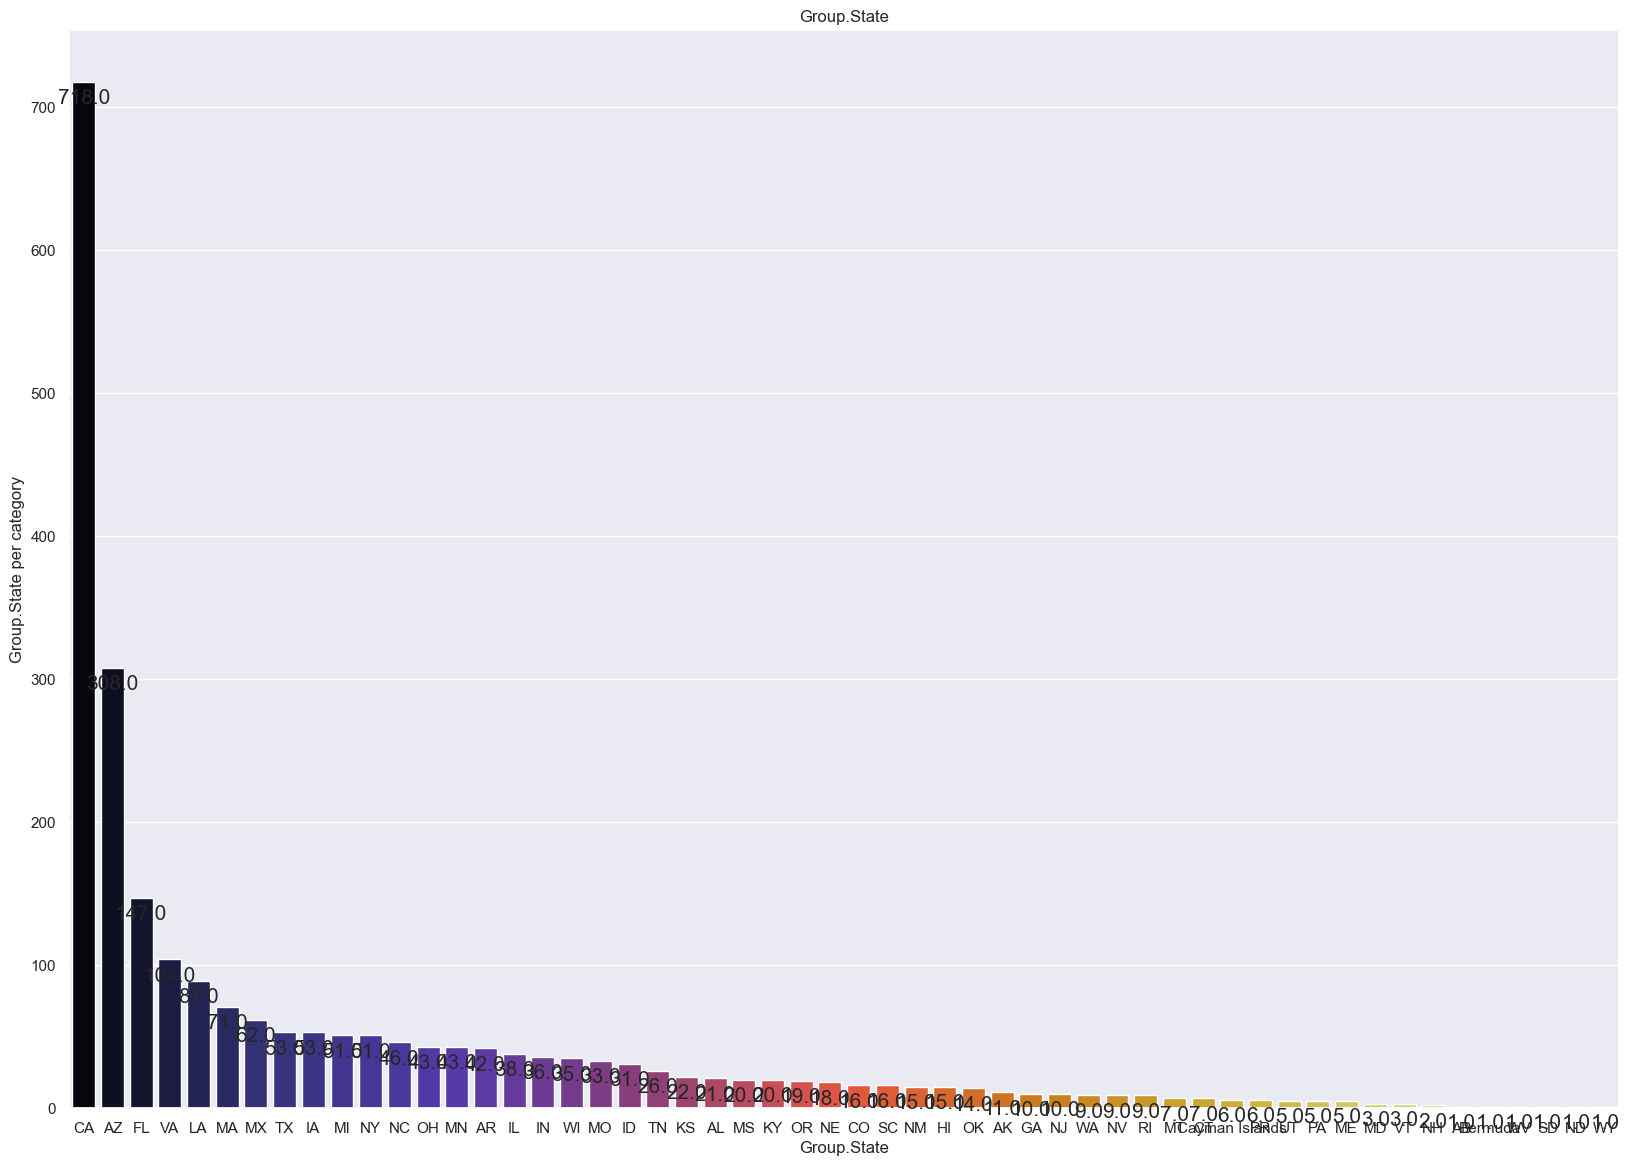

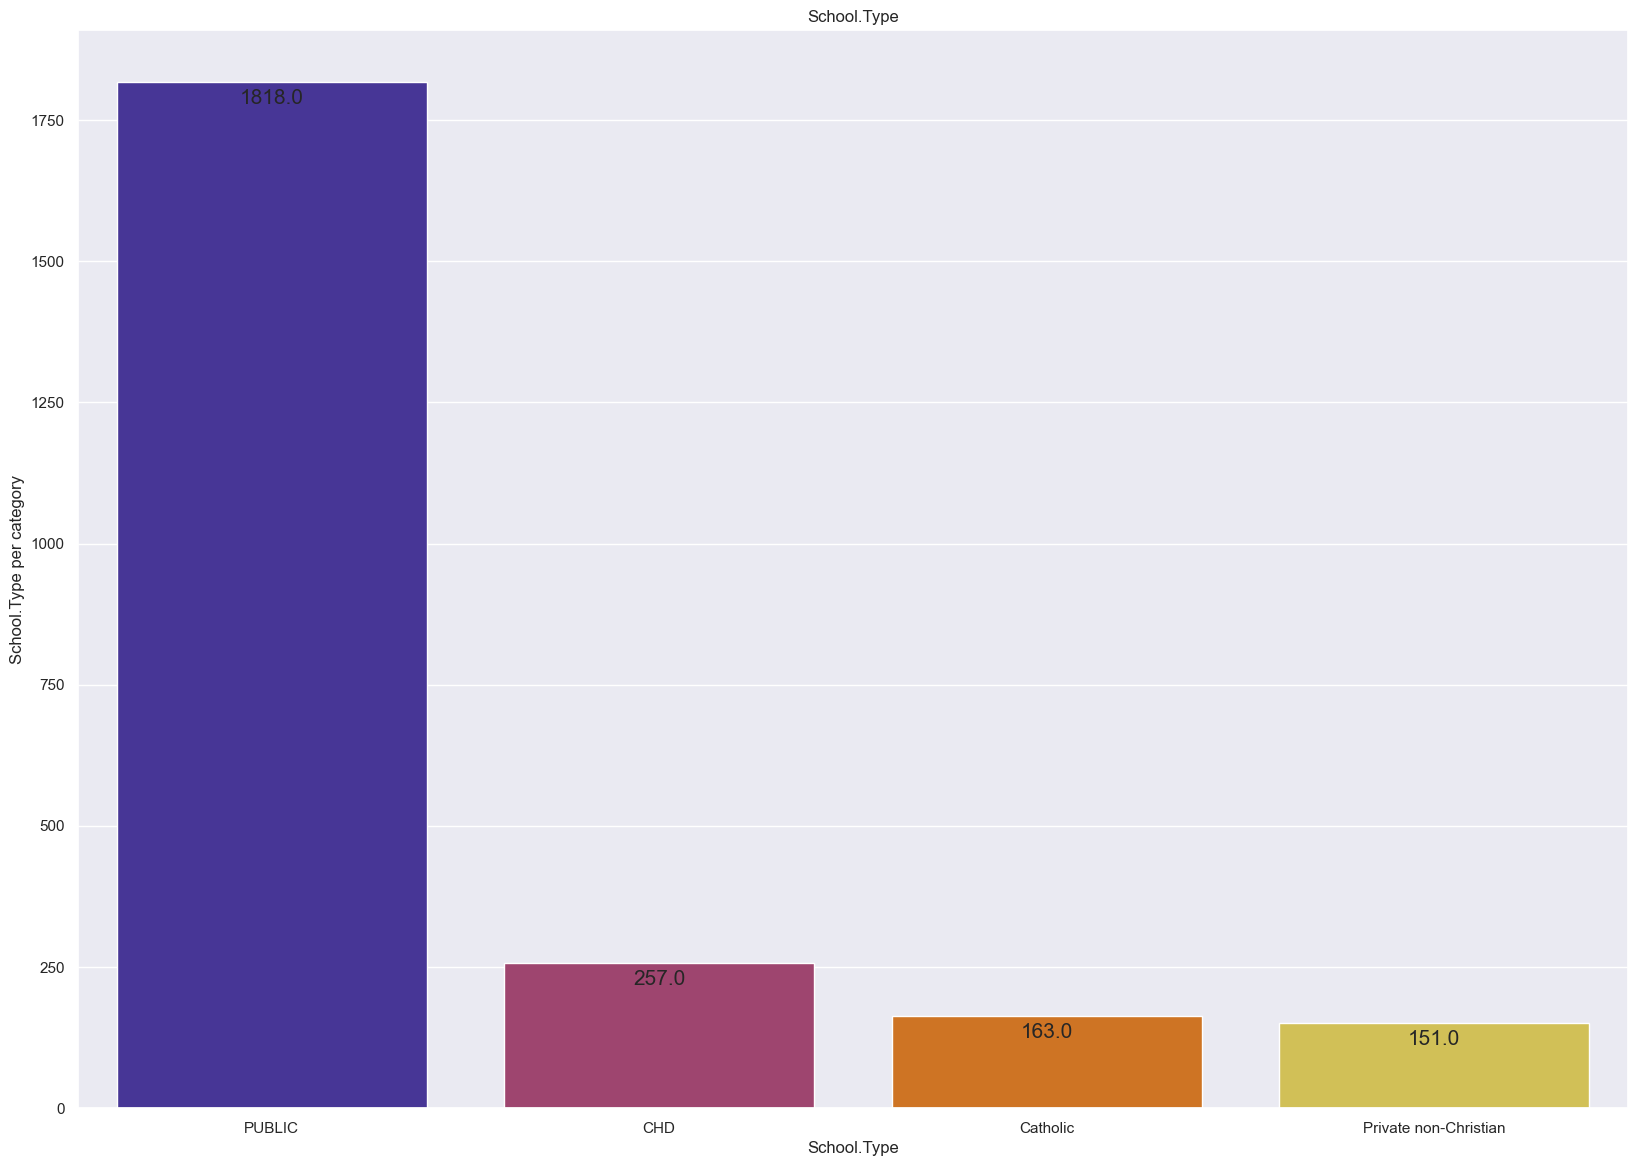

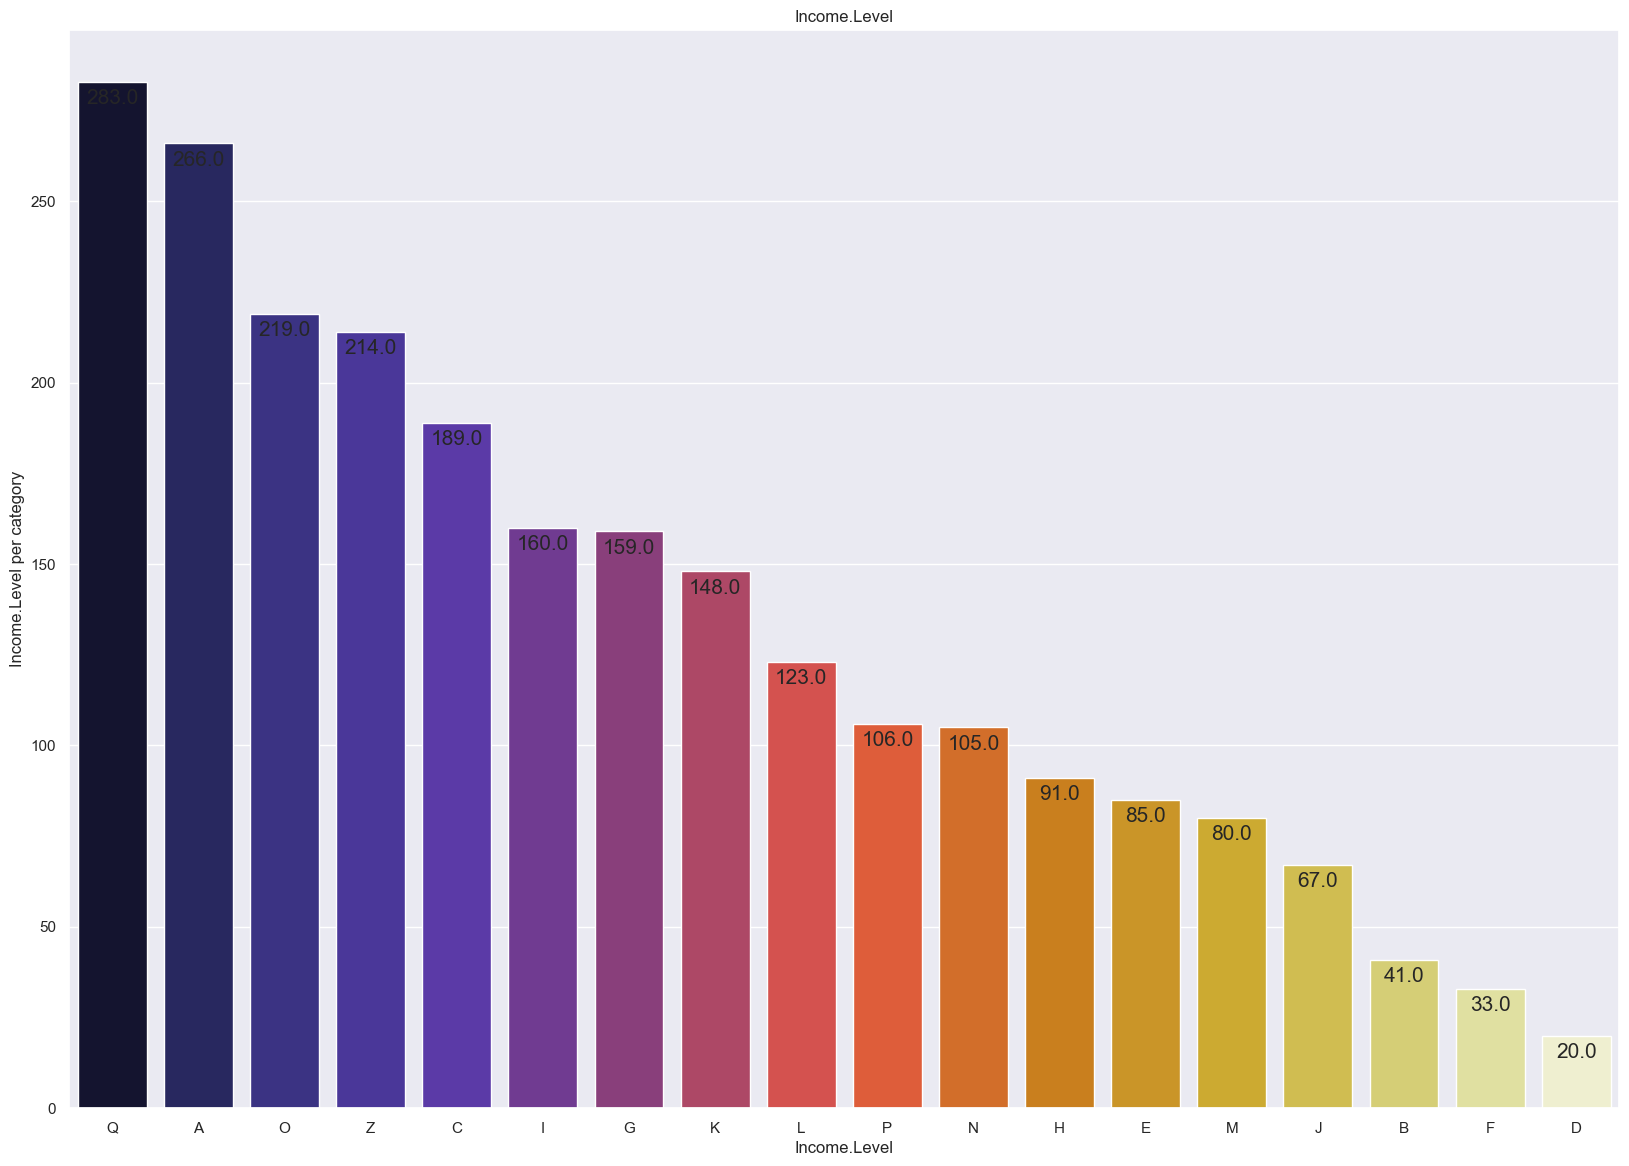

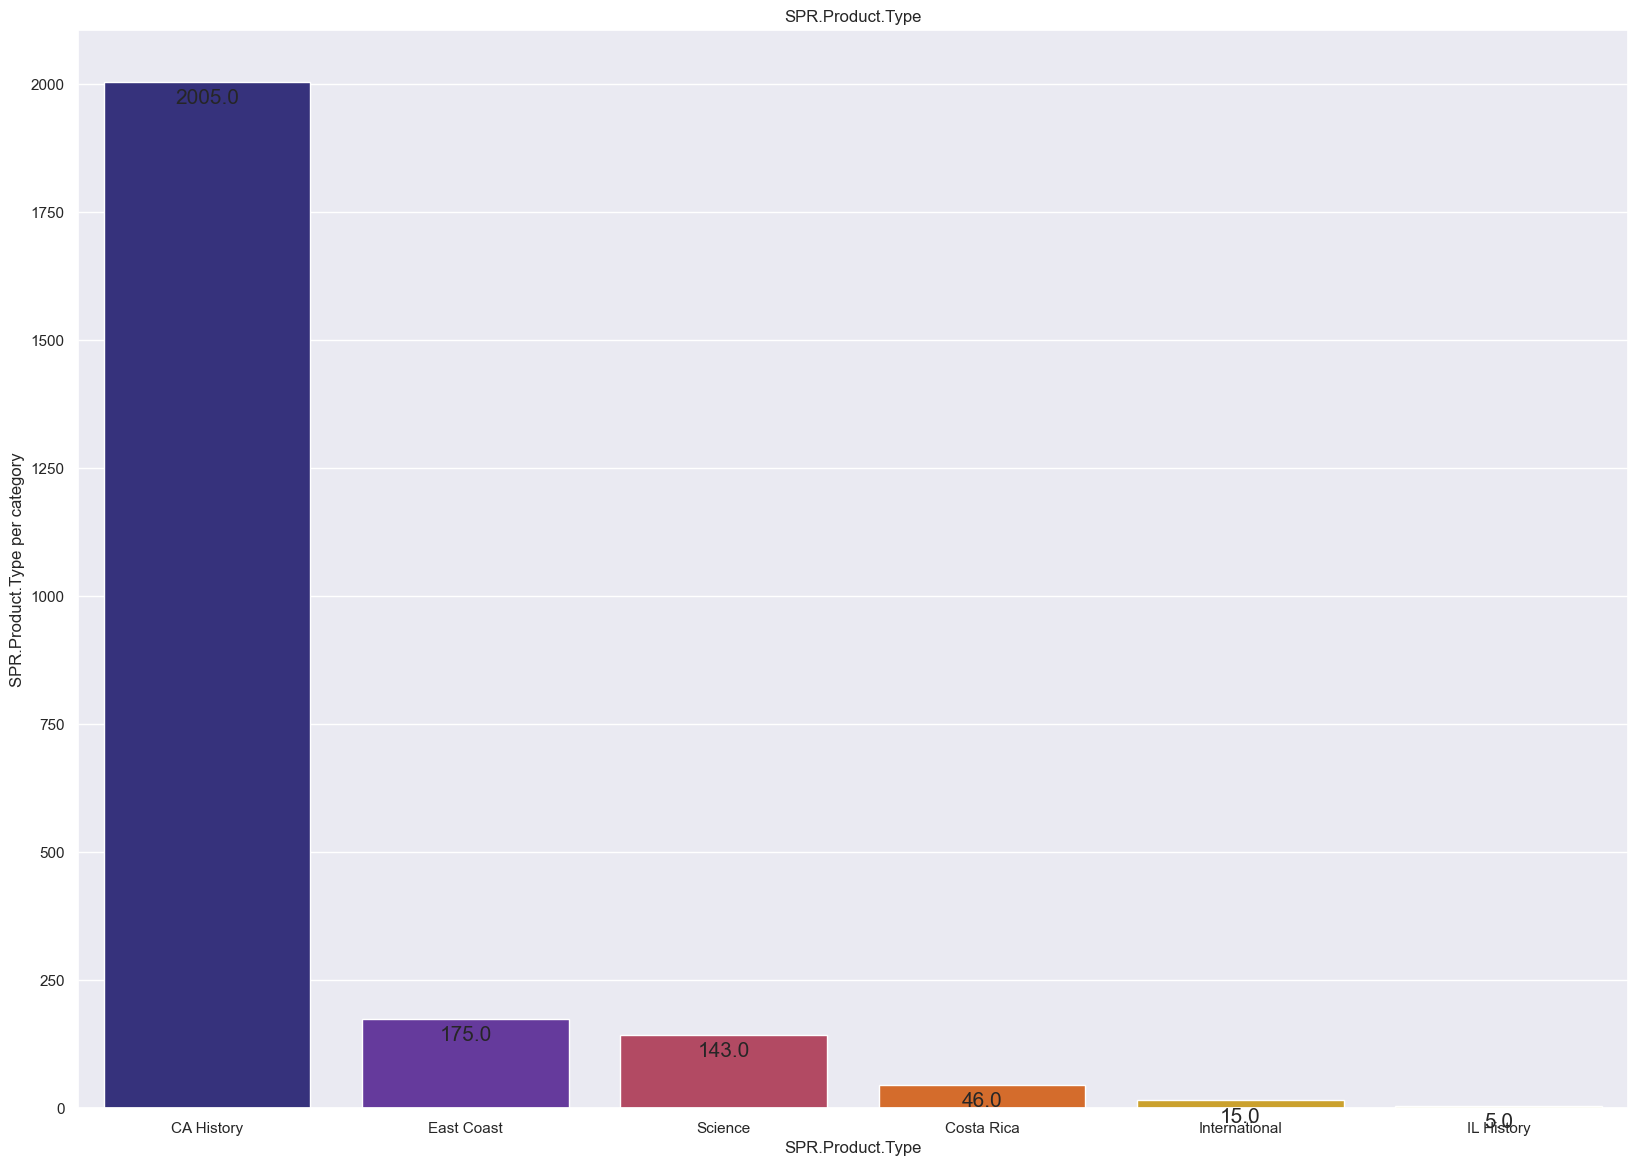

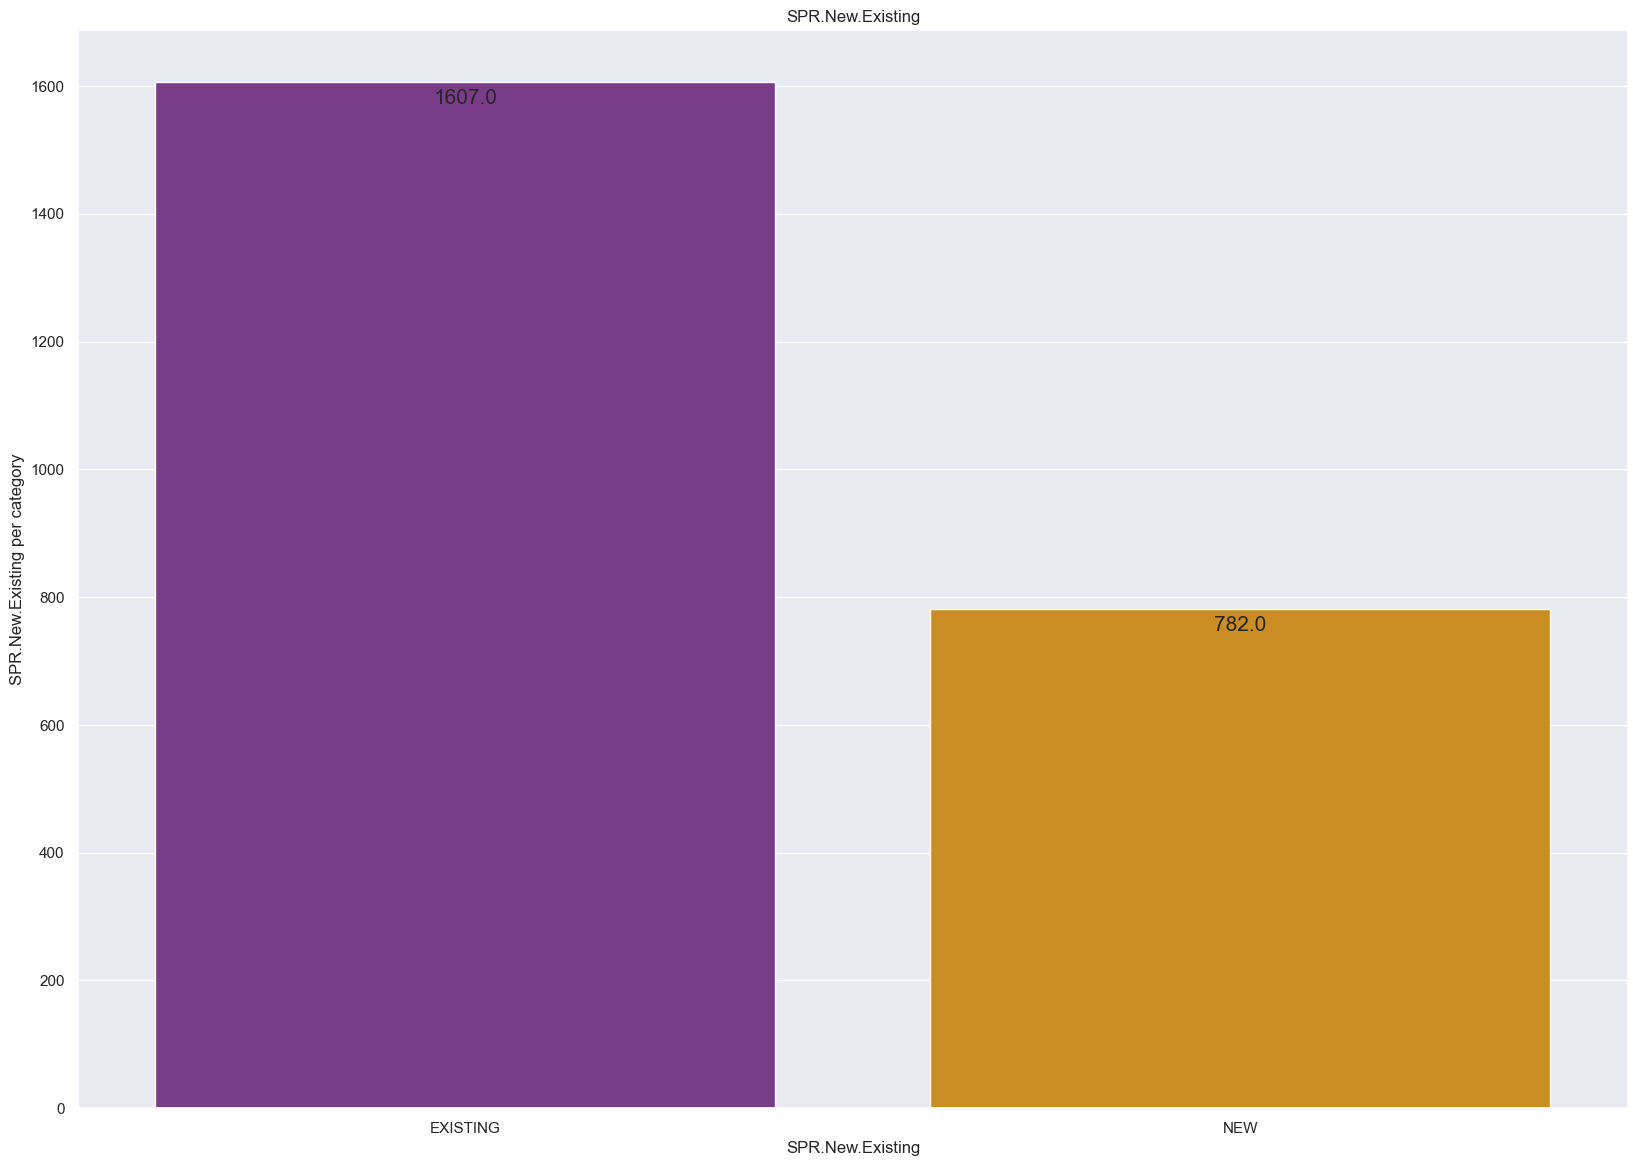

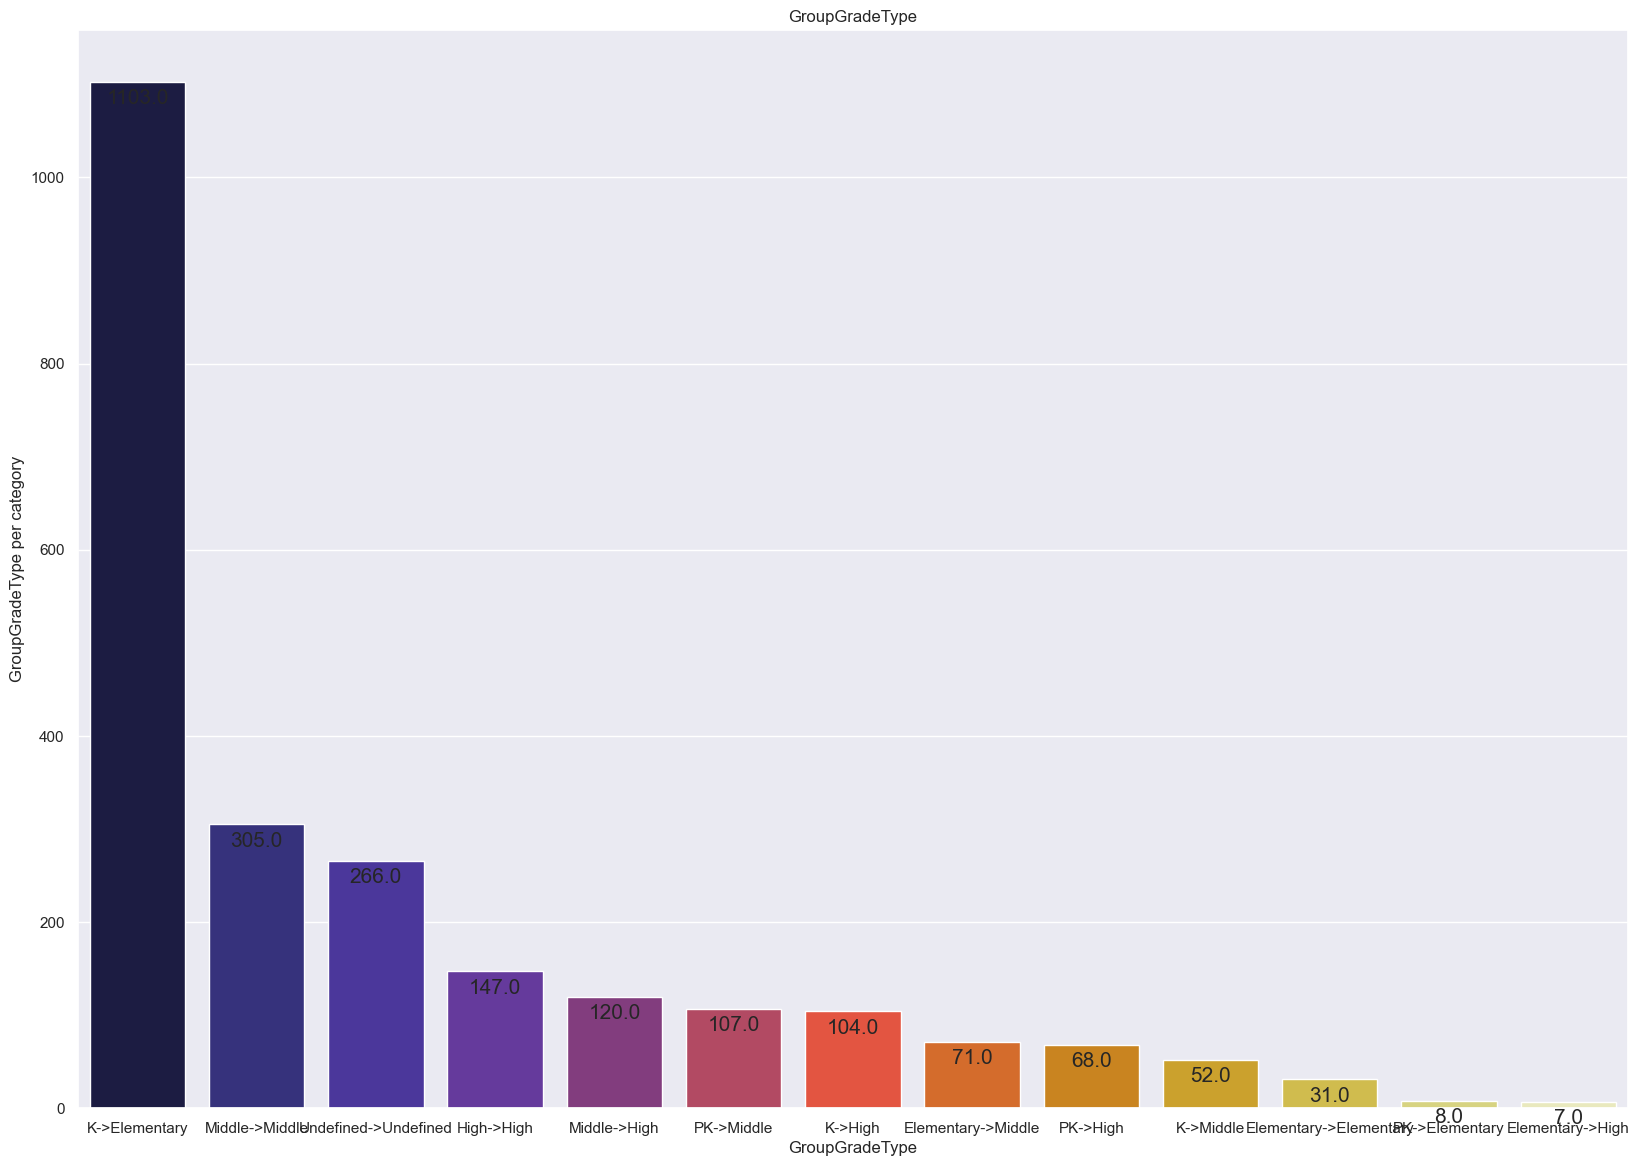

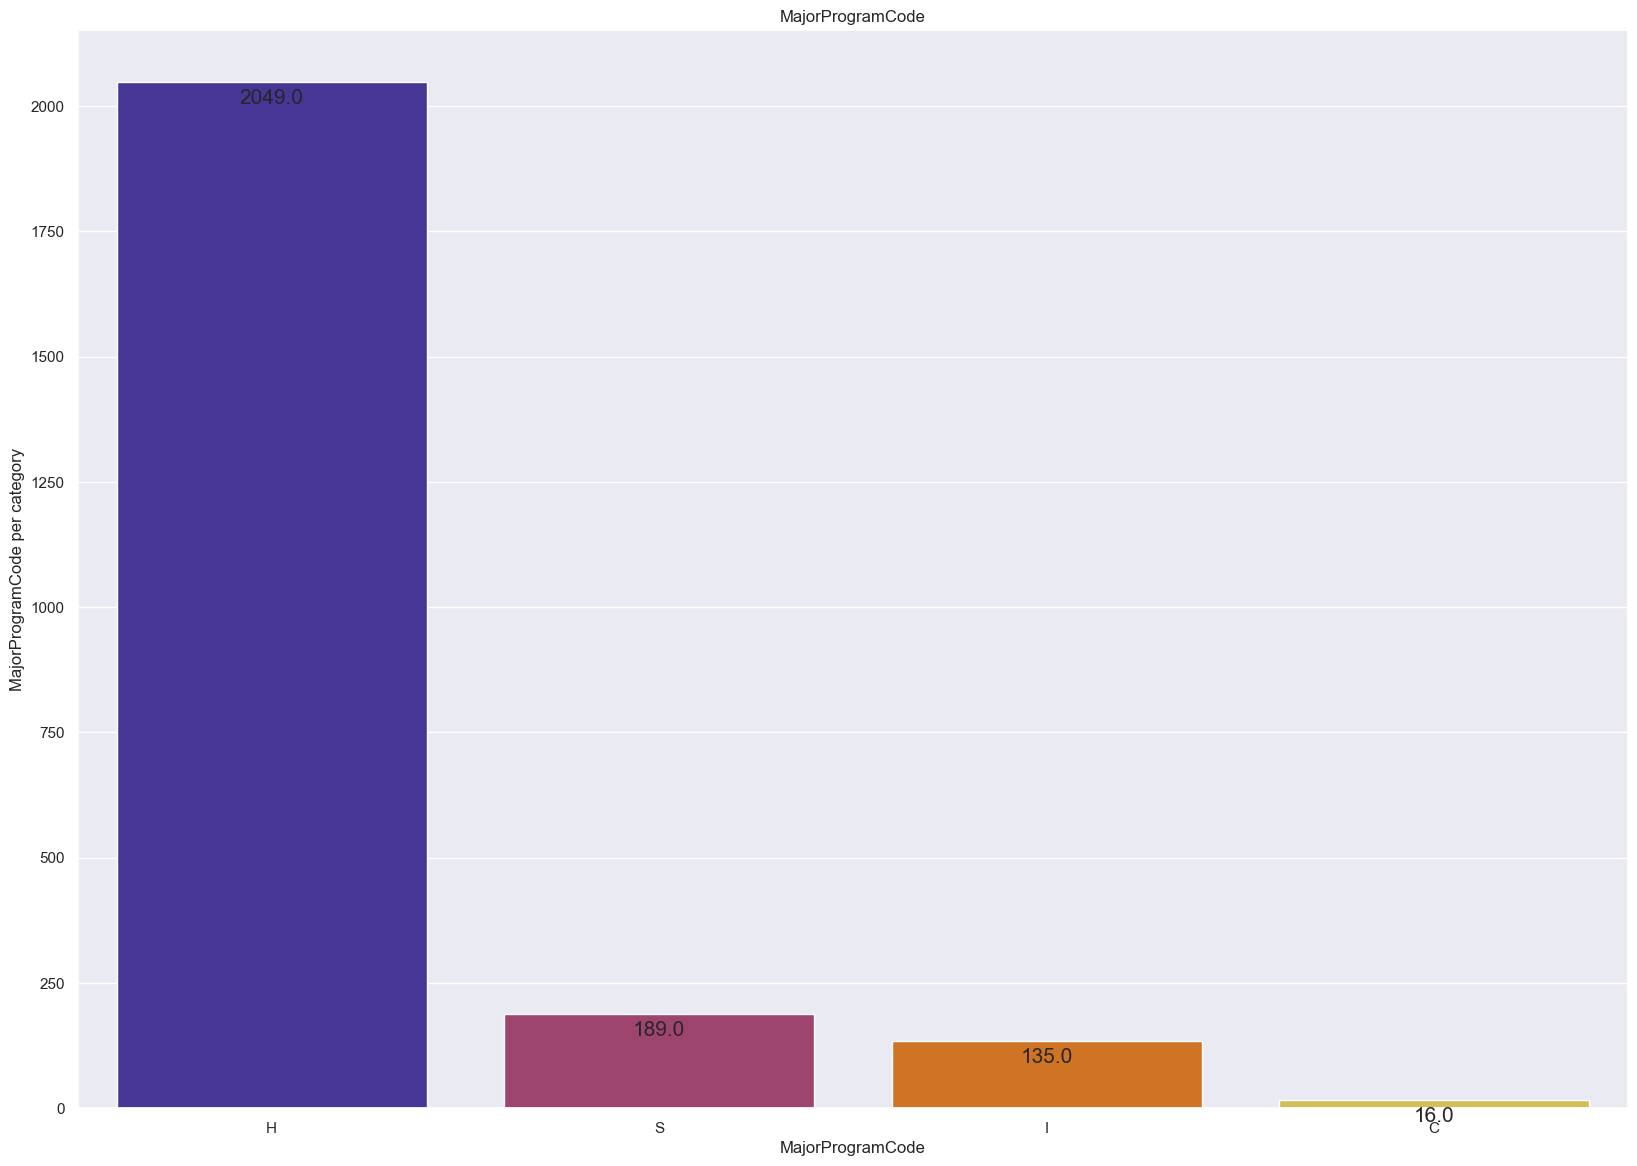

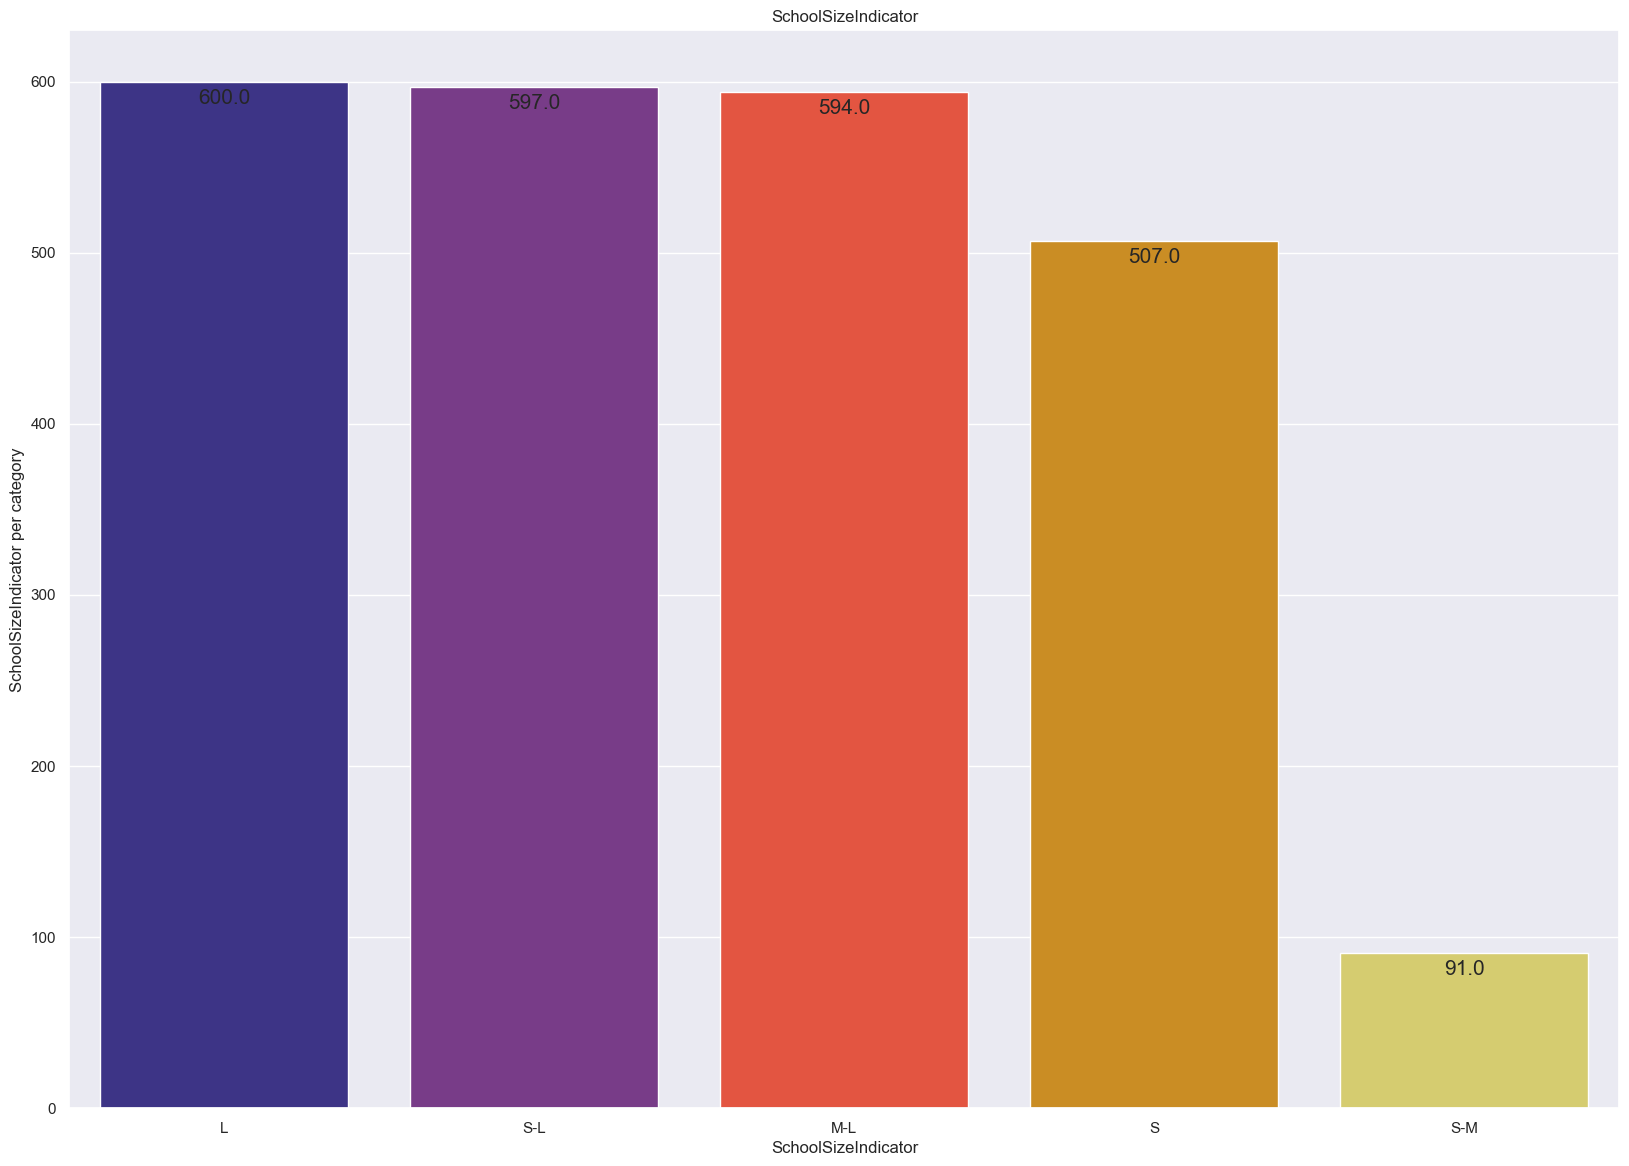

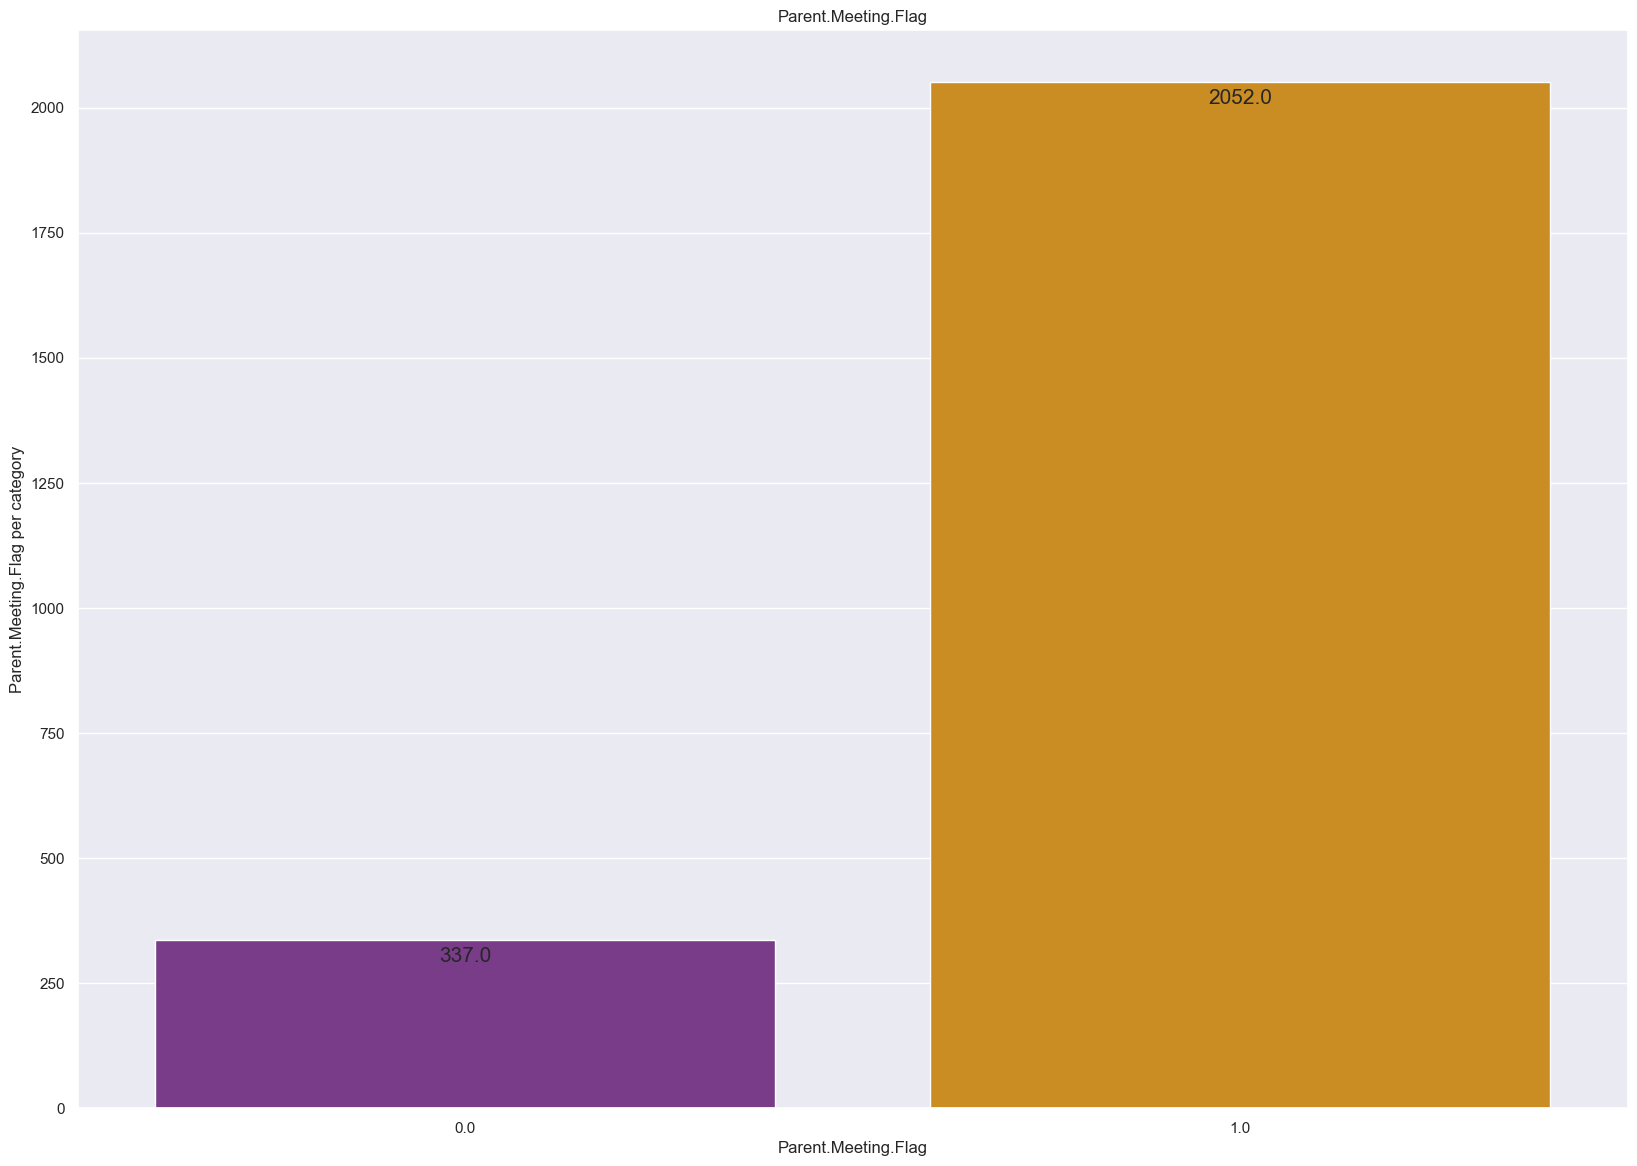

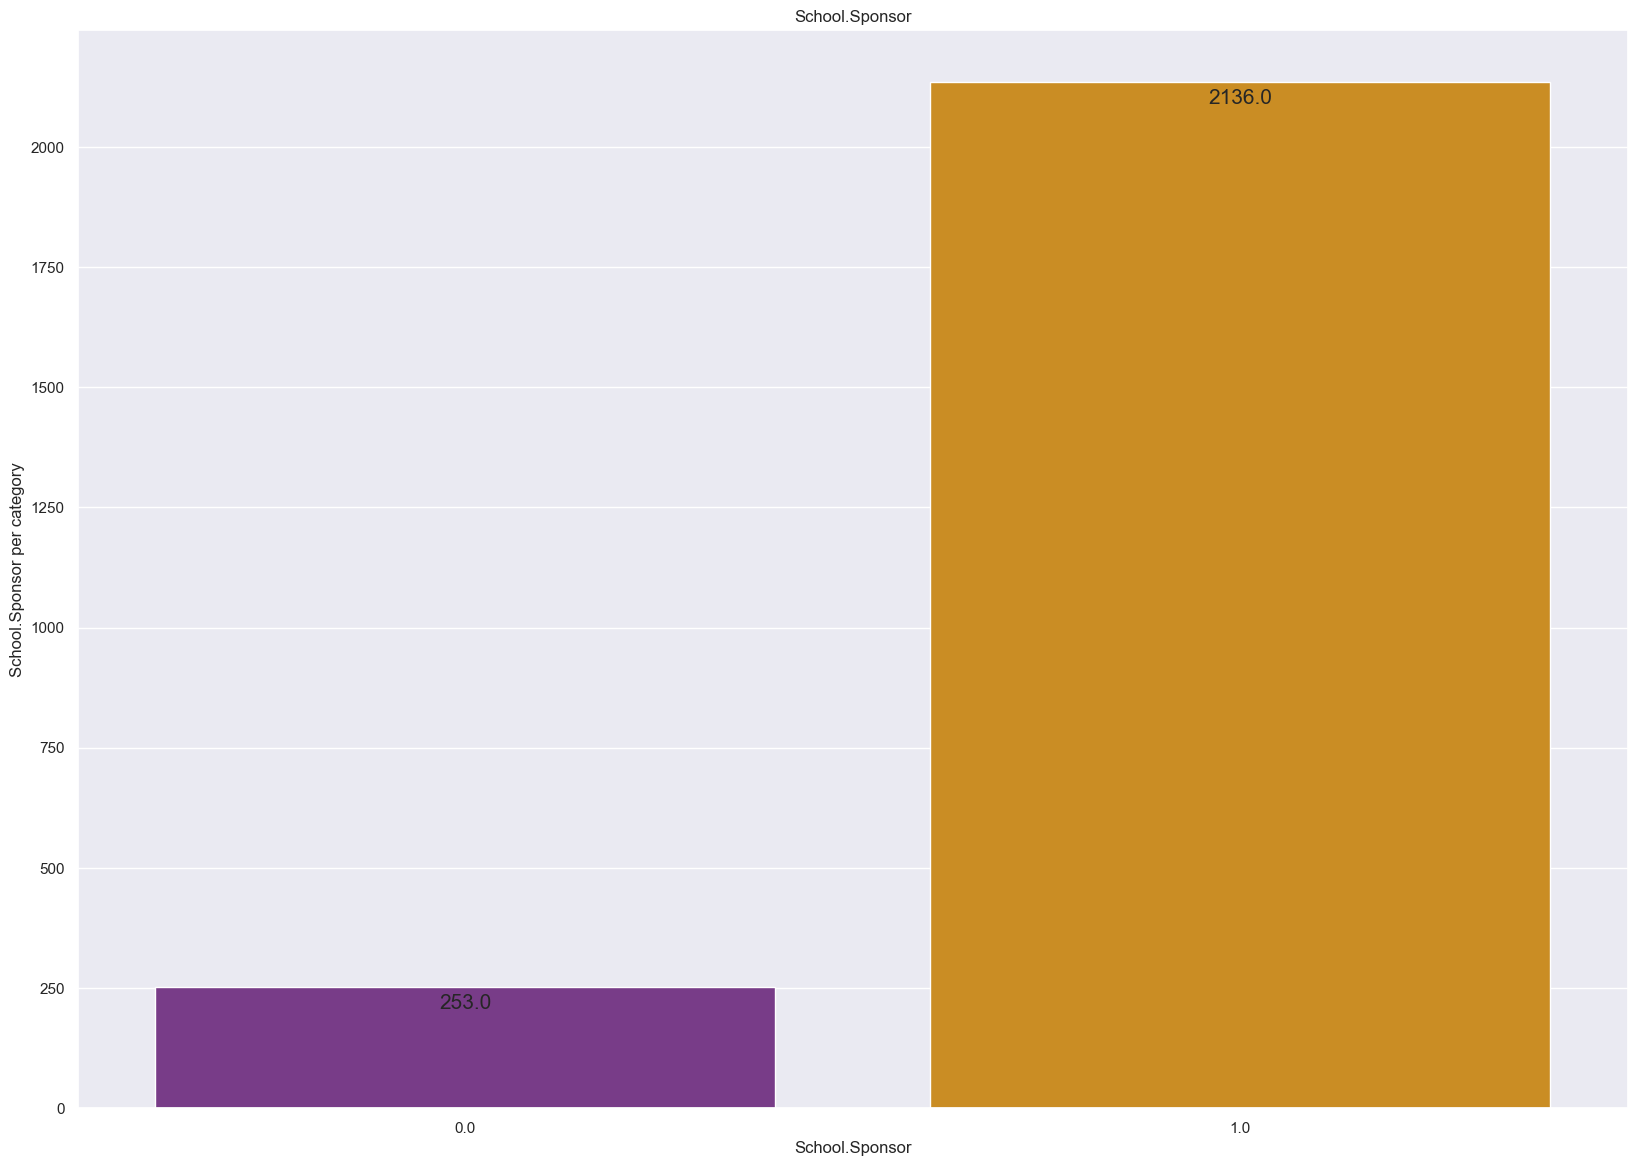

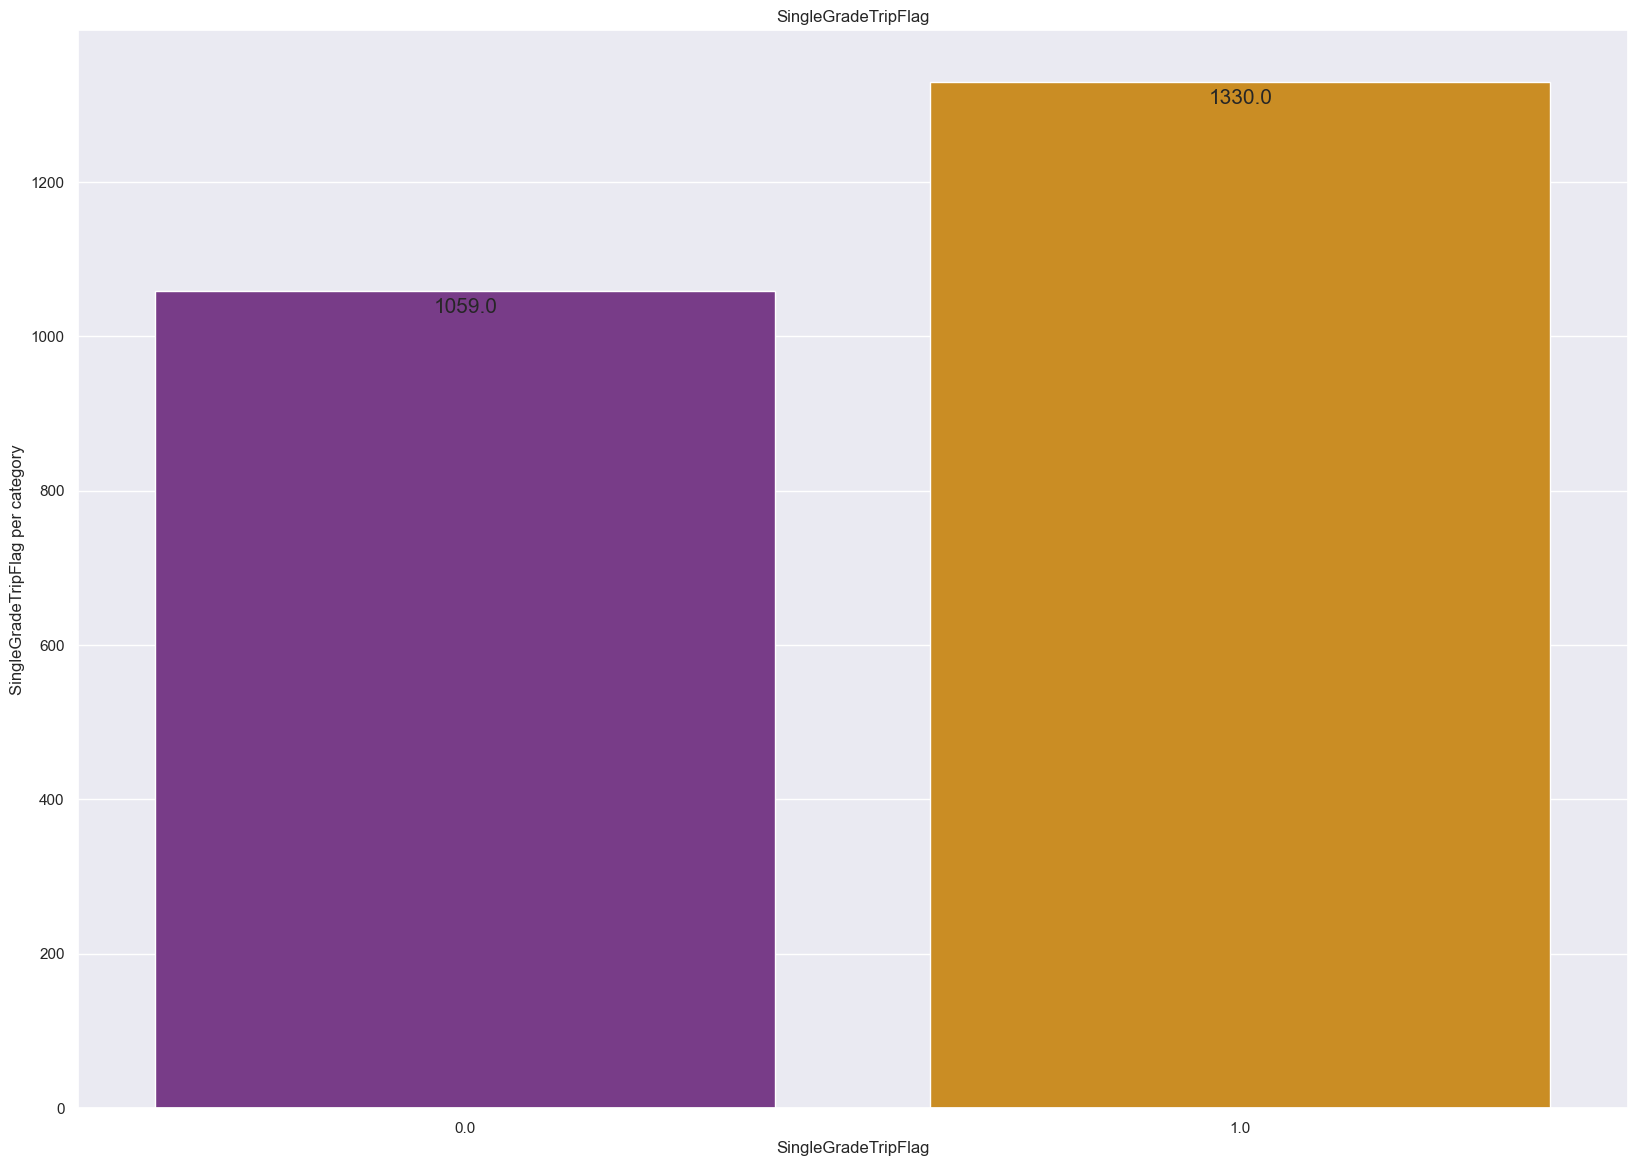

In [77]:
for c in All_category_columns:
  if not df[c].isnull().any():
    x=df[c].unique()
    y=df[c].value_counts().values
    sns.set(font_scale=1)
    plt.figure(figsize=(20,14))
    splot = sns.barplot(x=x, y=y, data=df, palette="CMRmap")
    for p in splot.patches:
      splot.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    size=15,
                    xytext = (0, -12), 
                    textcoords = 'offset points')
    plt.xlabel(df[c].name)
    plt.ylabel(f'{df[c].name} per category')
    plt.title(f'{df[c].name}')
    plt.show()

<AxesSubplot:xlabel='DepartureMonth', ylabel='SingleGradeTripFlag'>

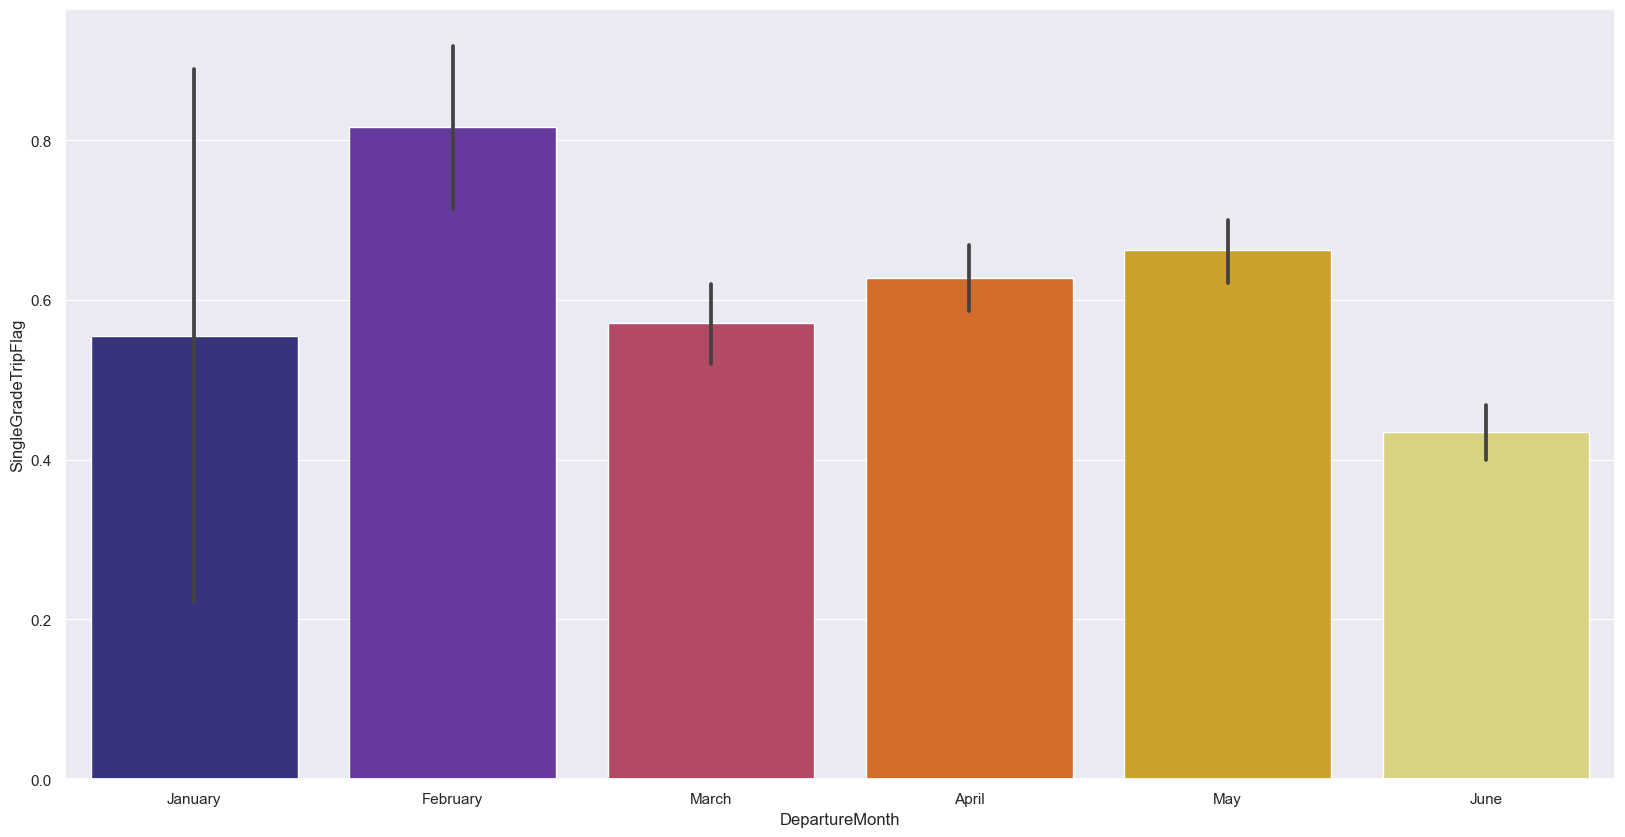

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['DepartureMonth'],y=df['SingleGradeTripFlag'],data=df, palette="CMRmap")

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


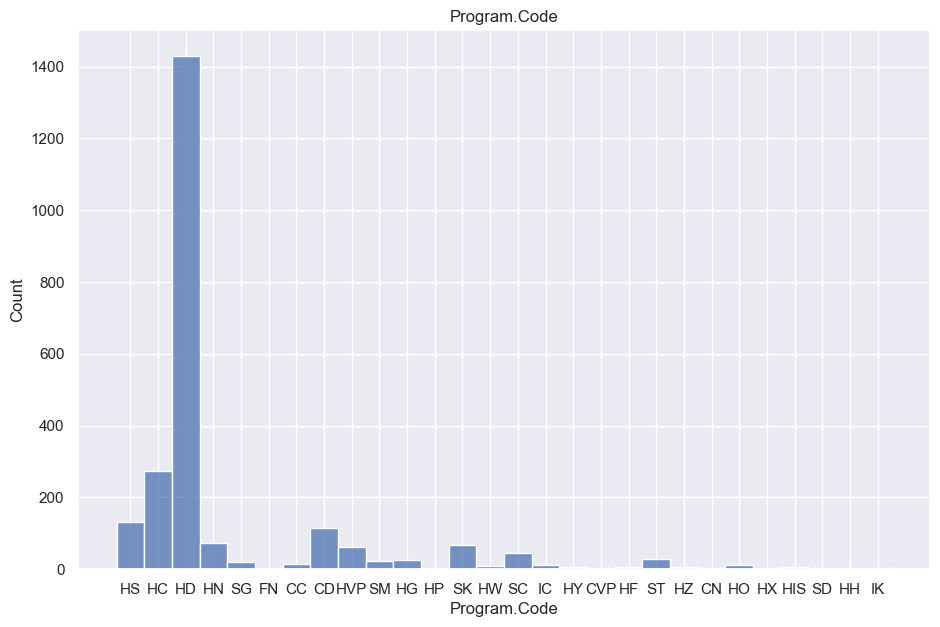

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


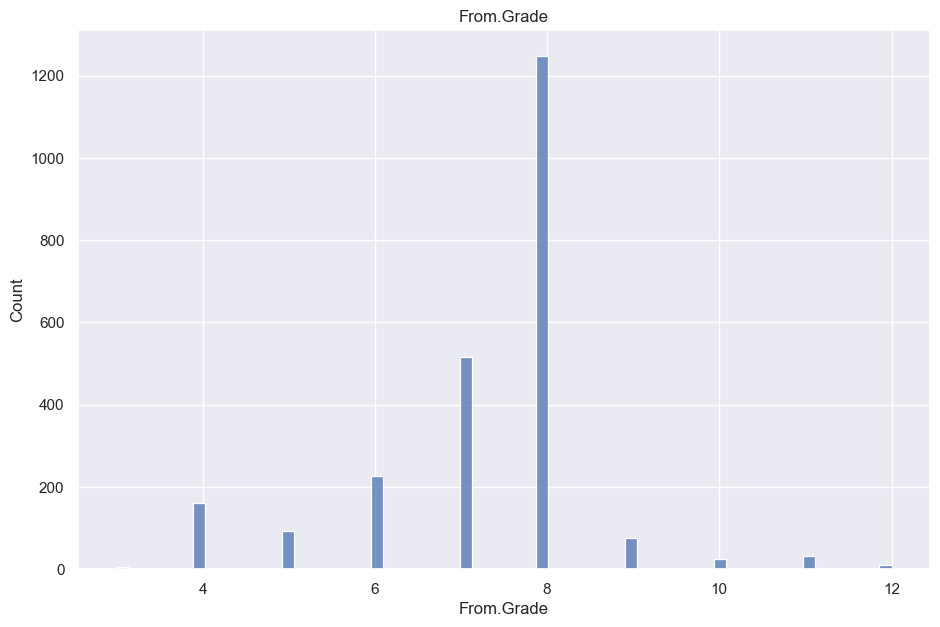

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


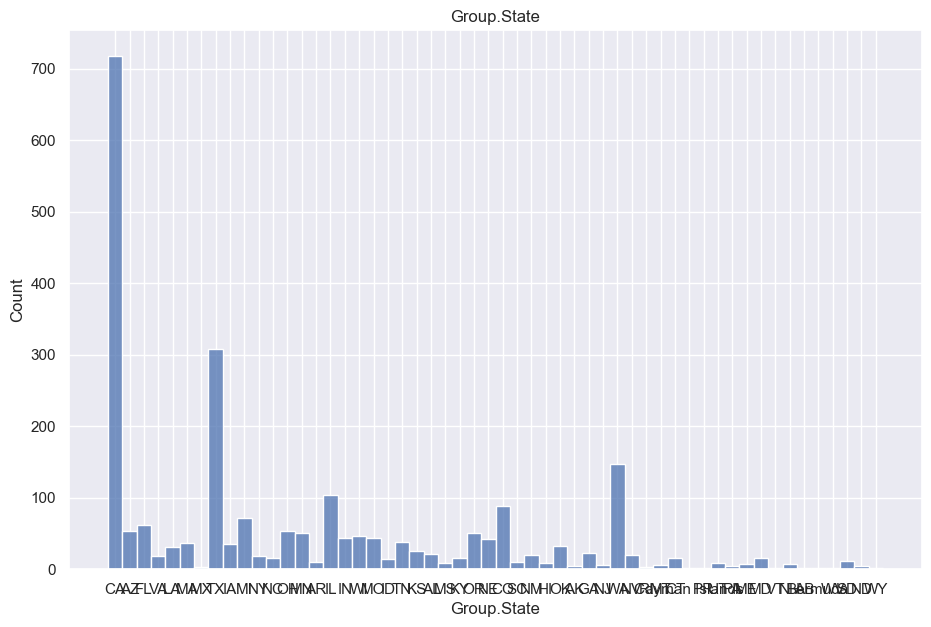

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


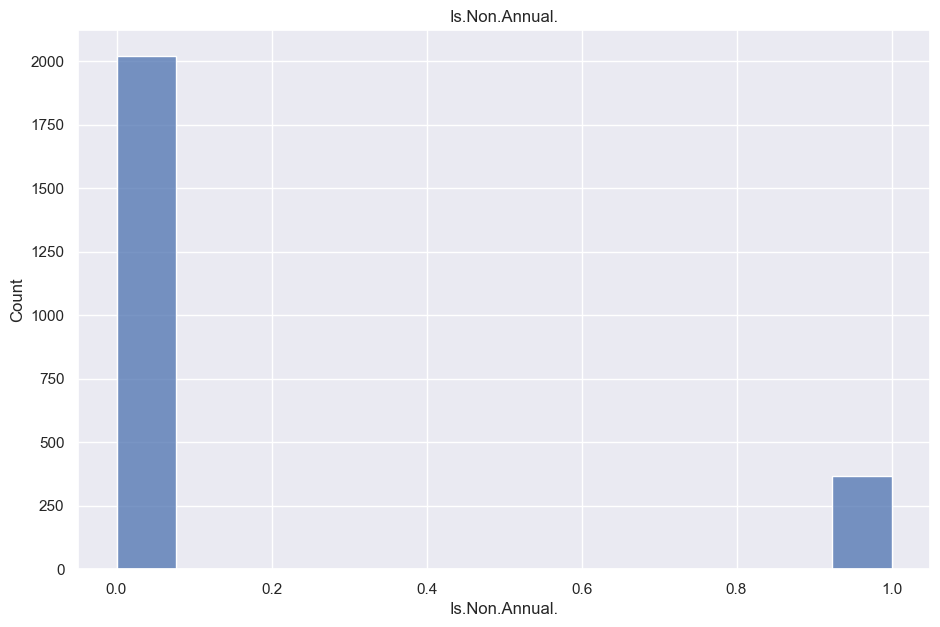

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


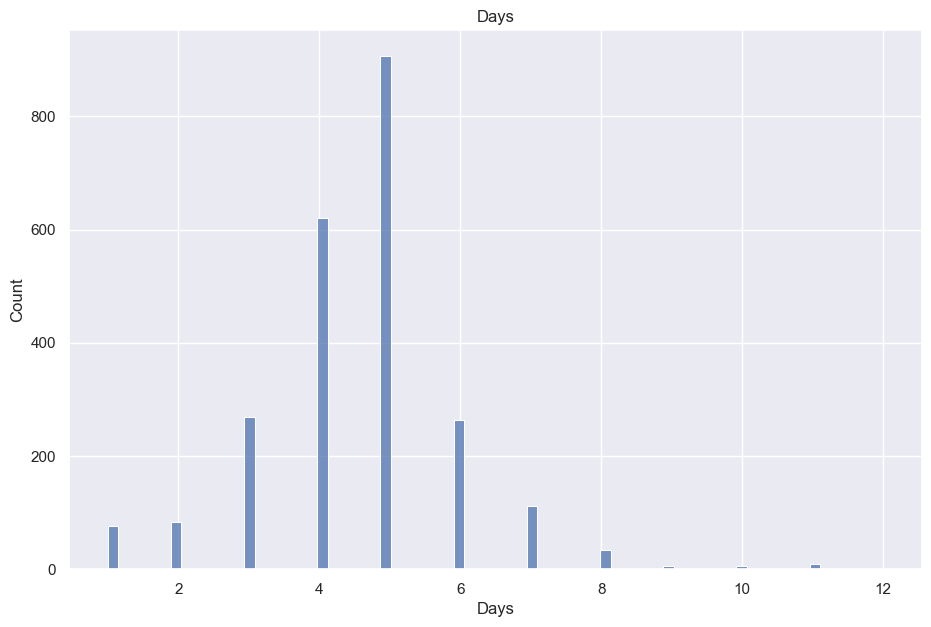

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


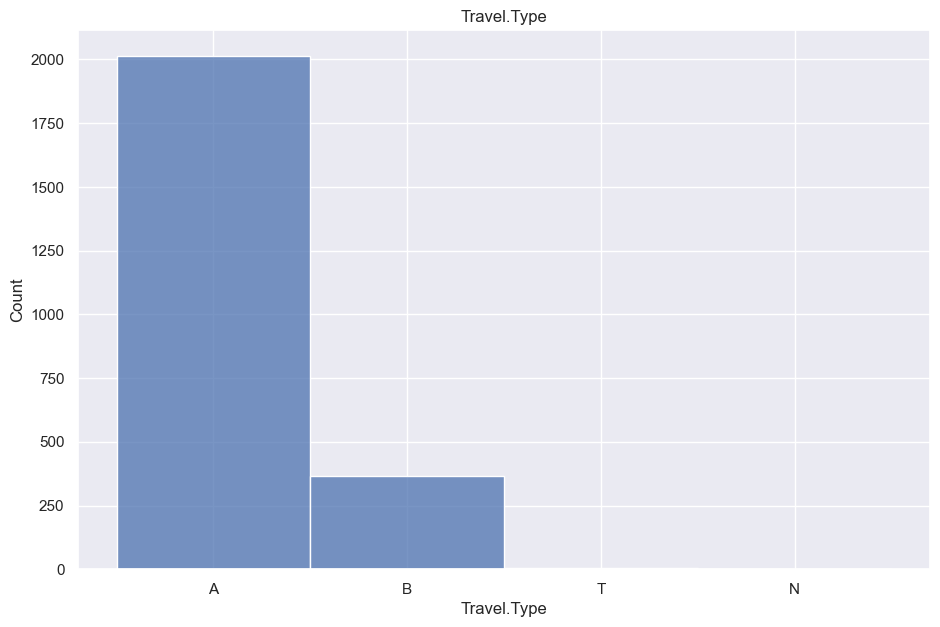

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


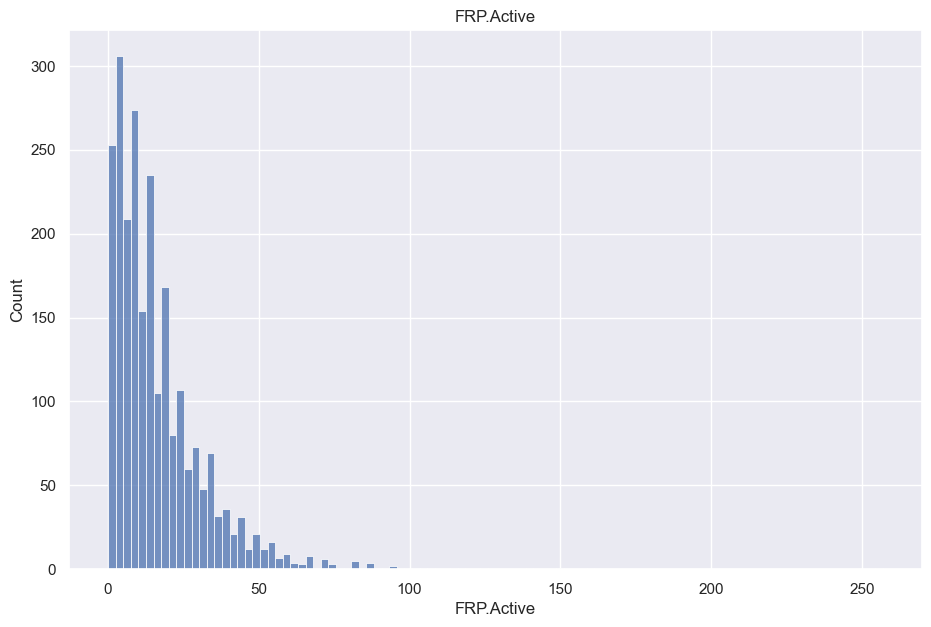

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


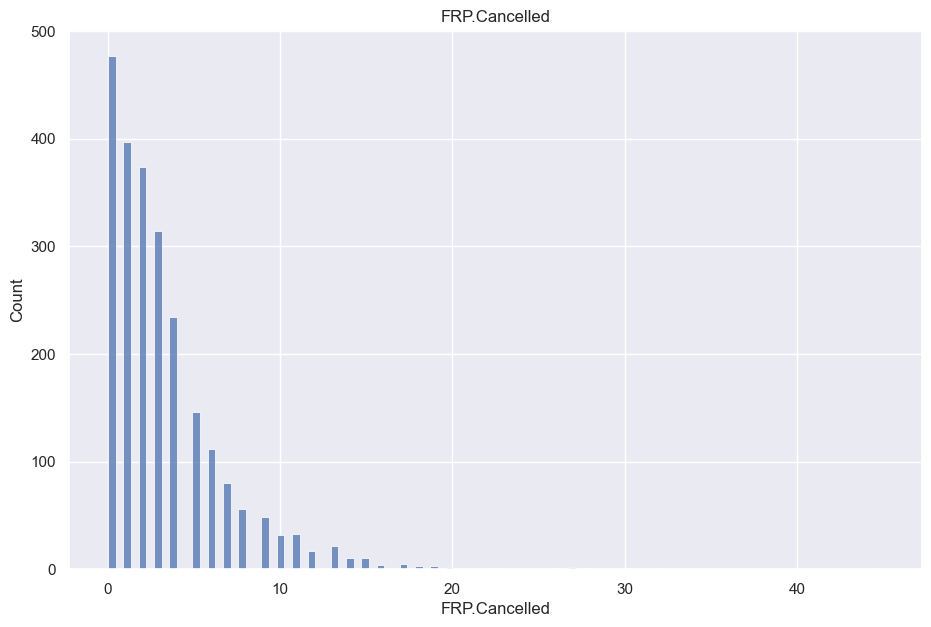

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


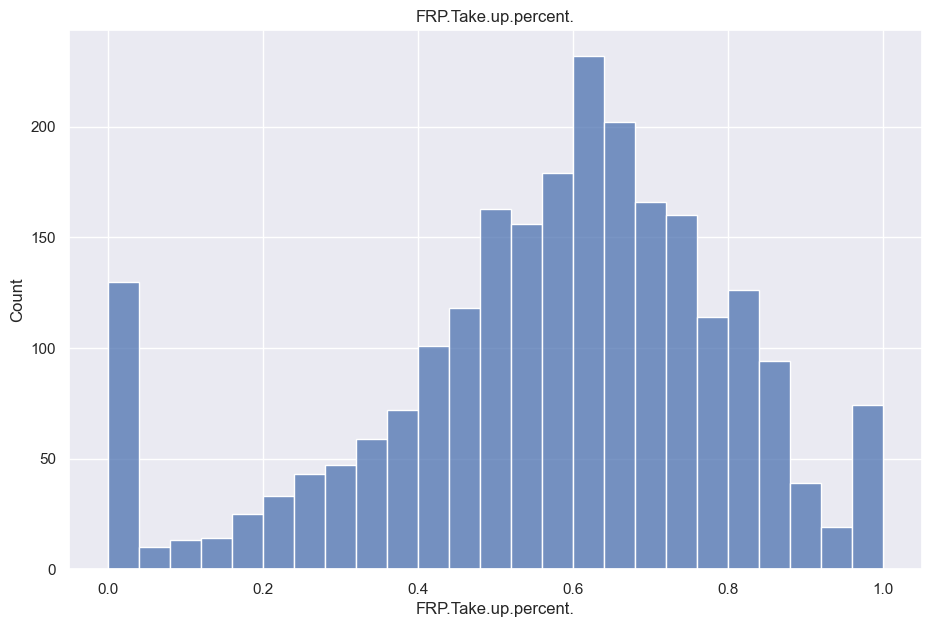

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


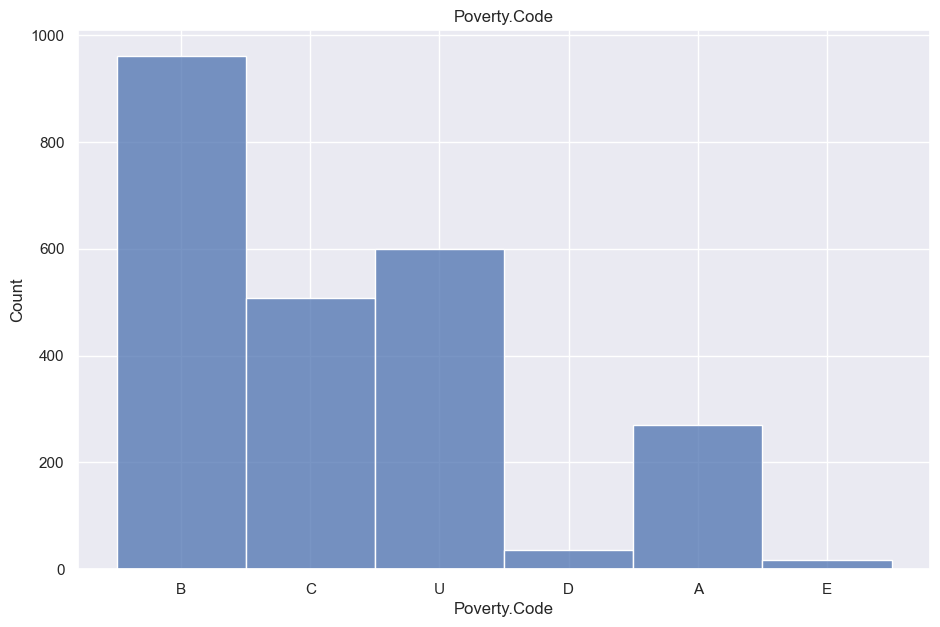

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


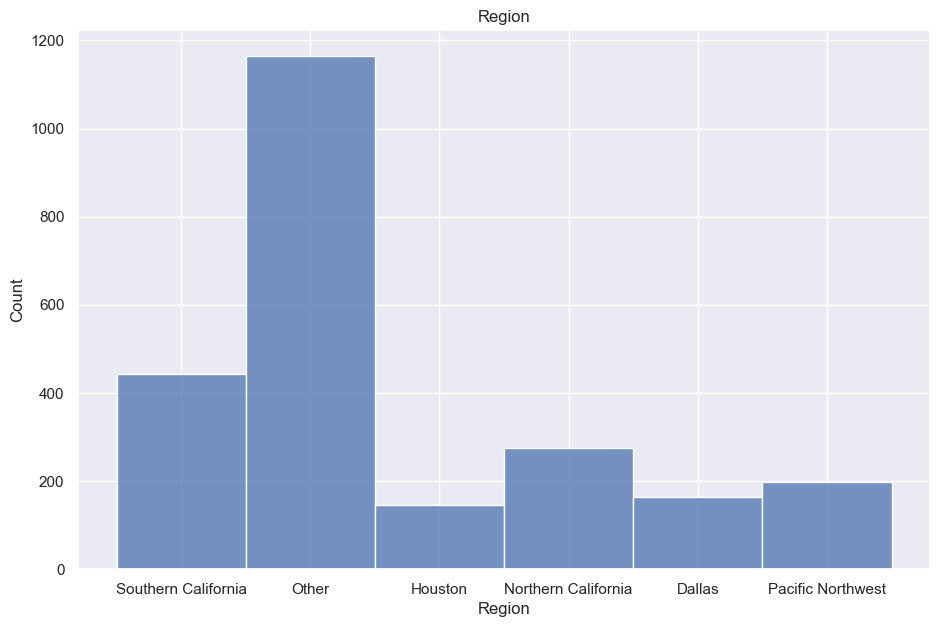

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


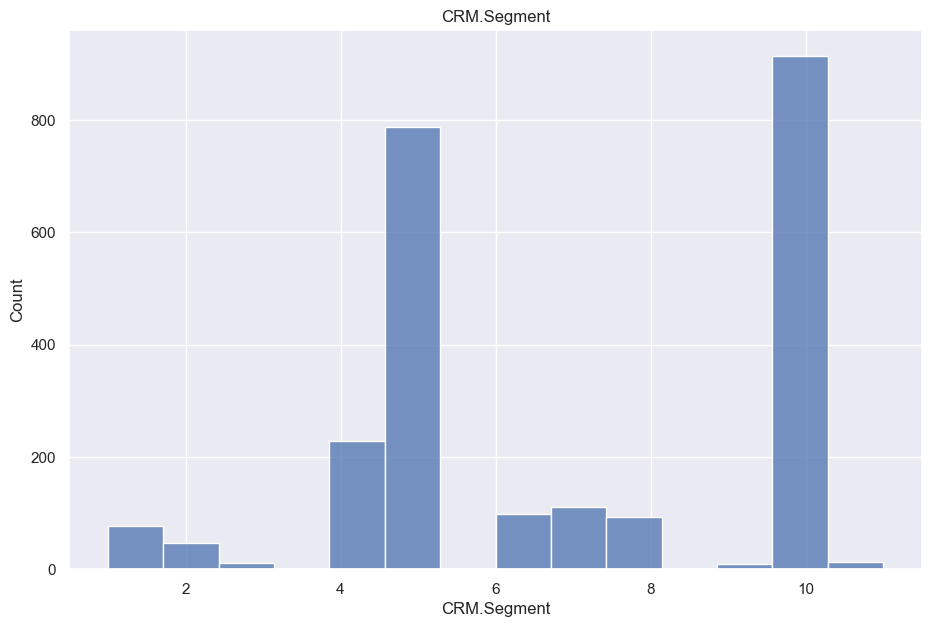

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


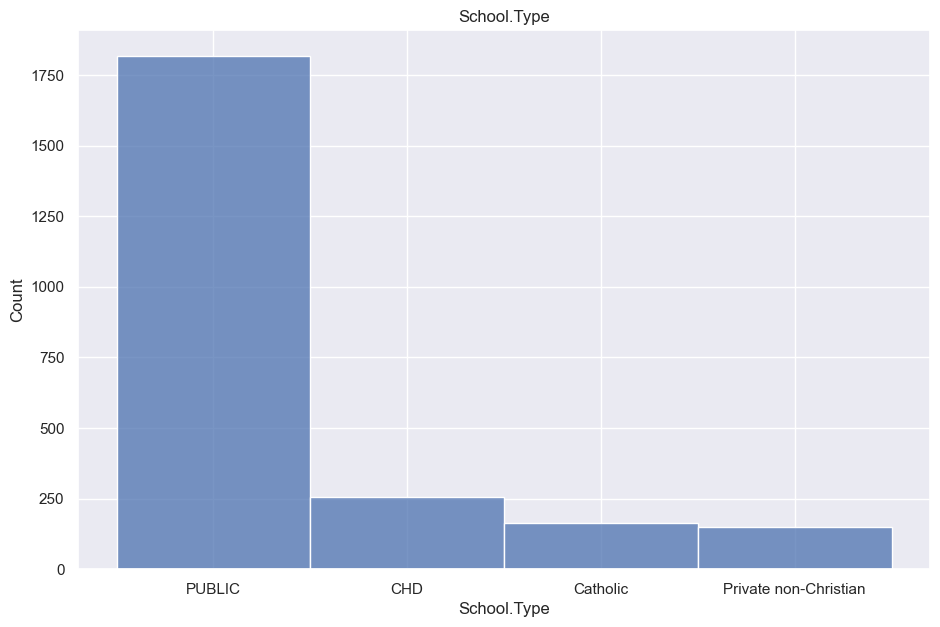

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


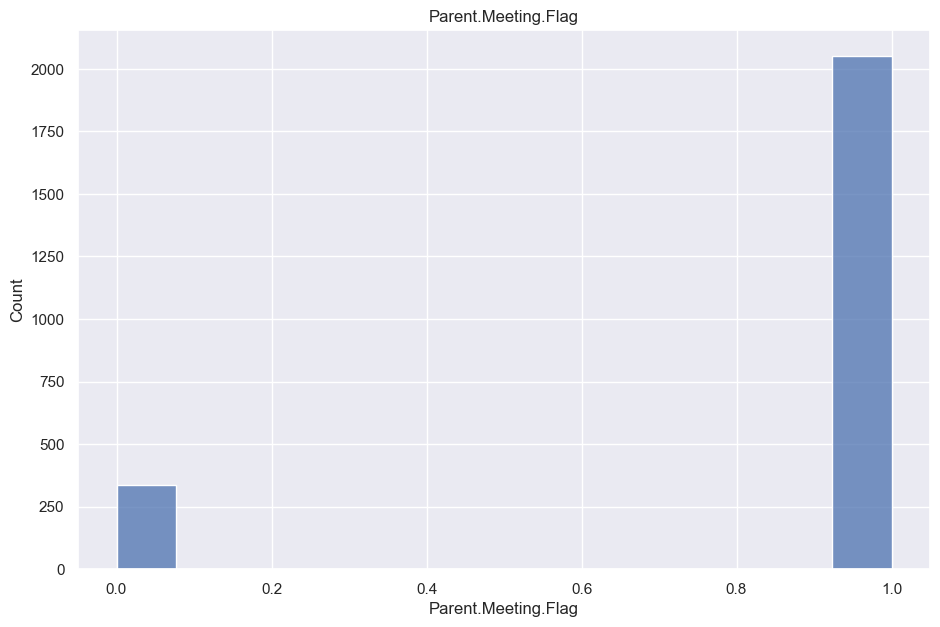

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


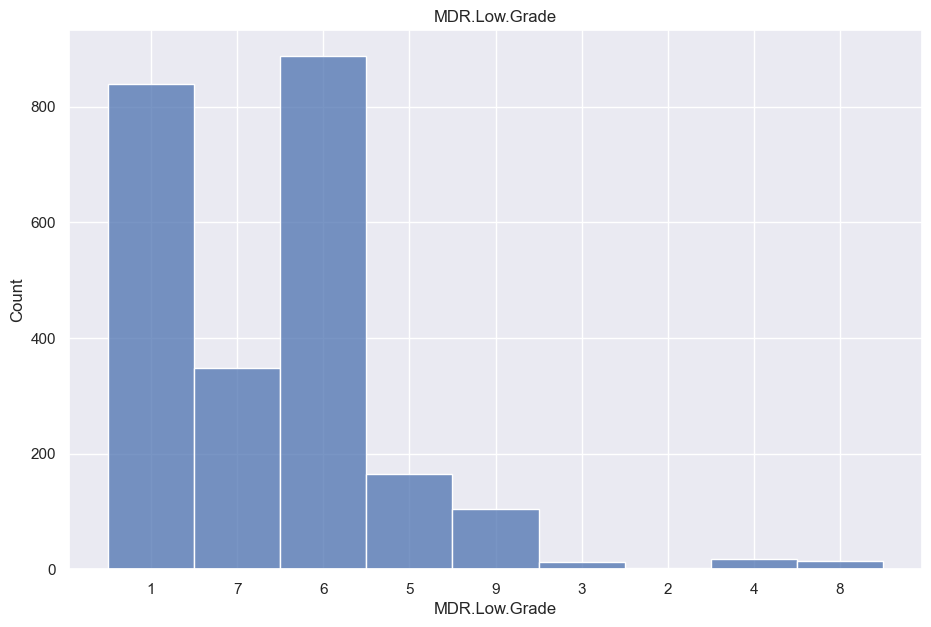

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


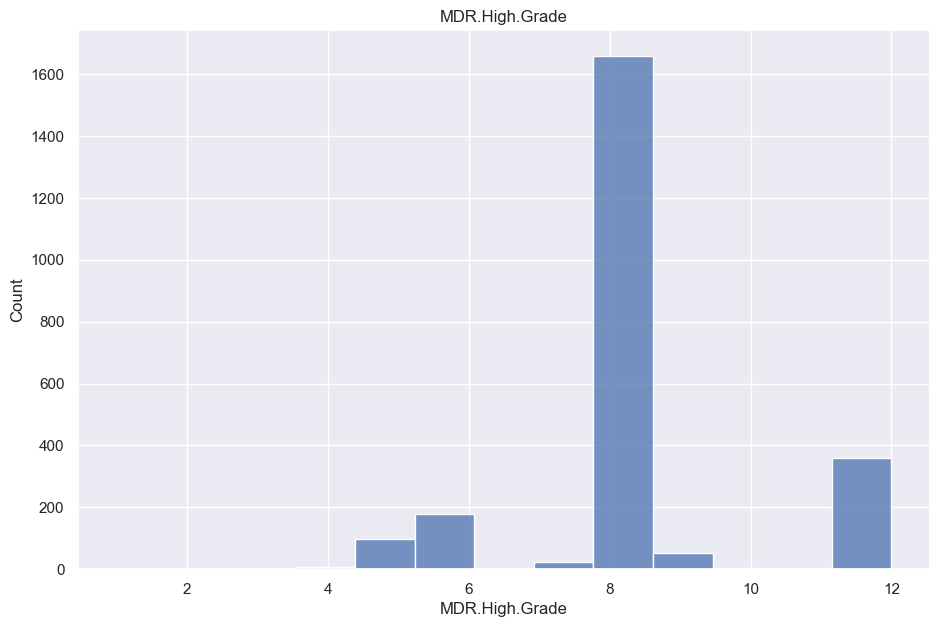

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


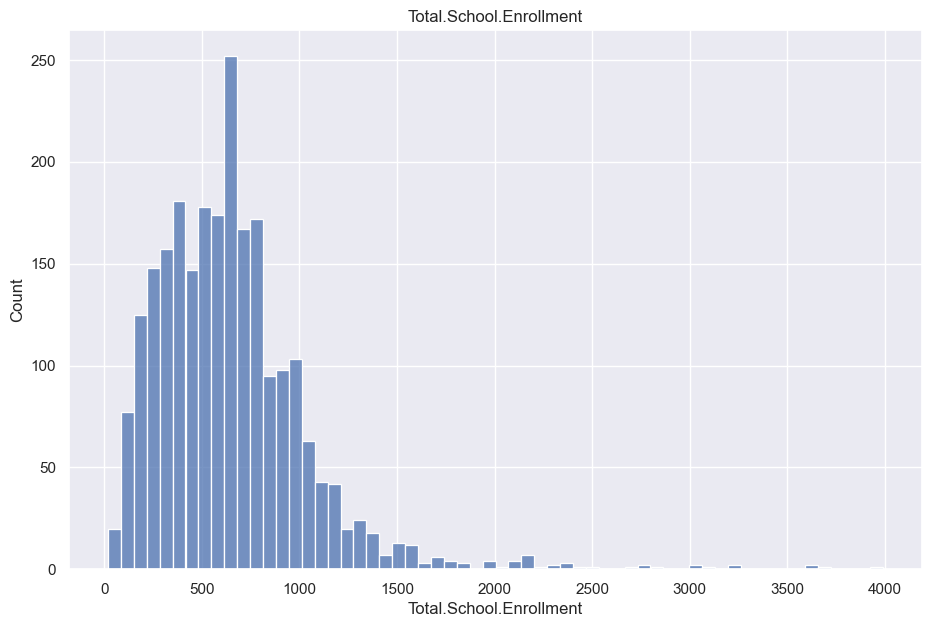

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


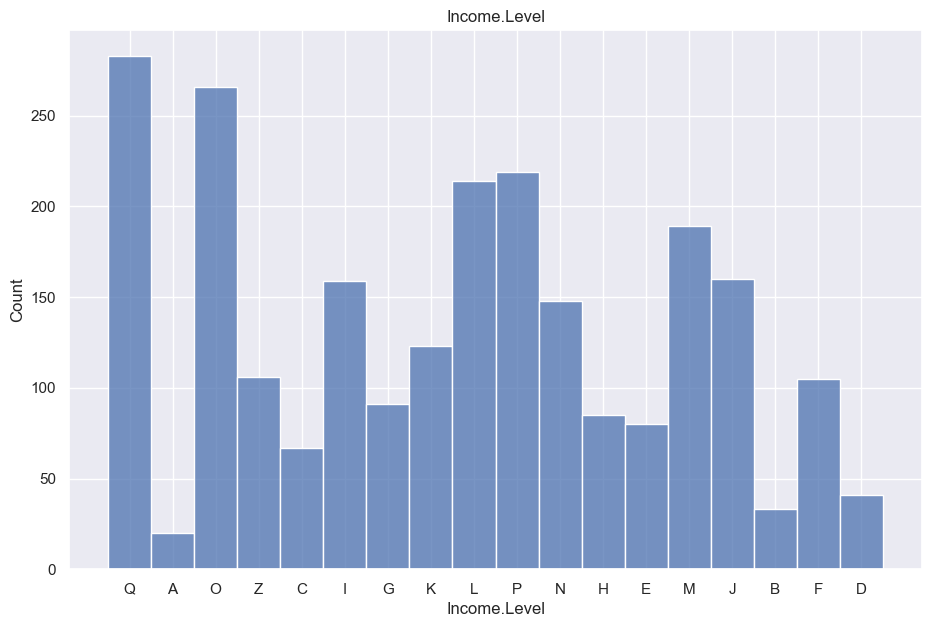

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


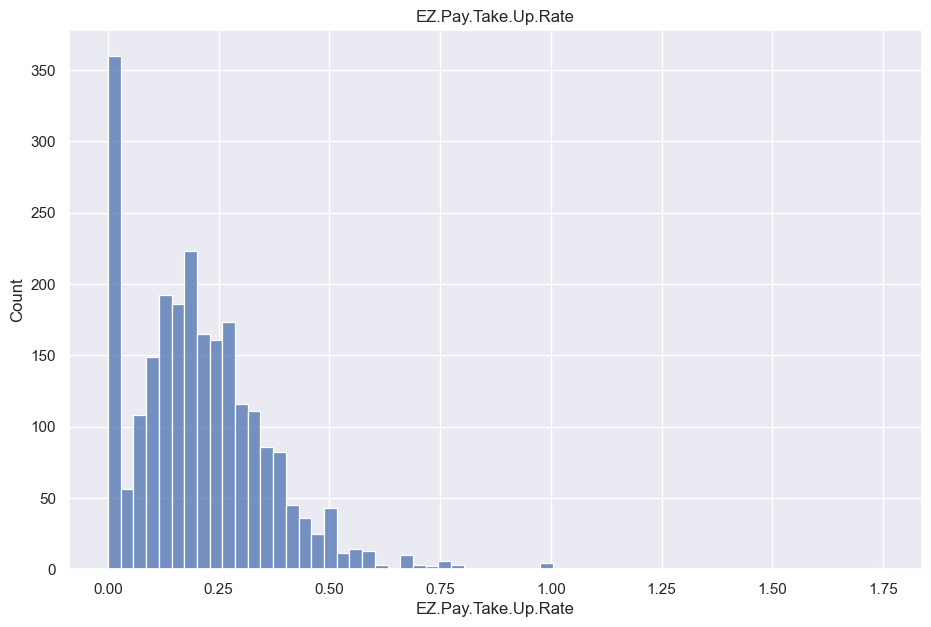

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


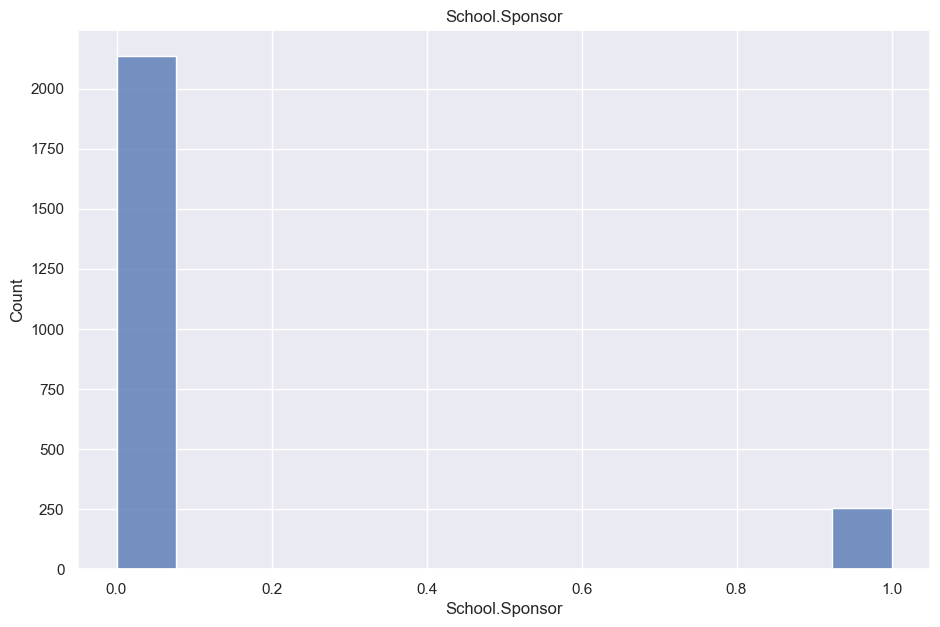

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


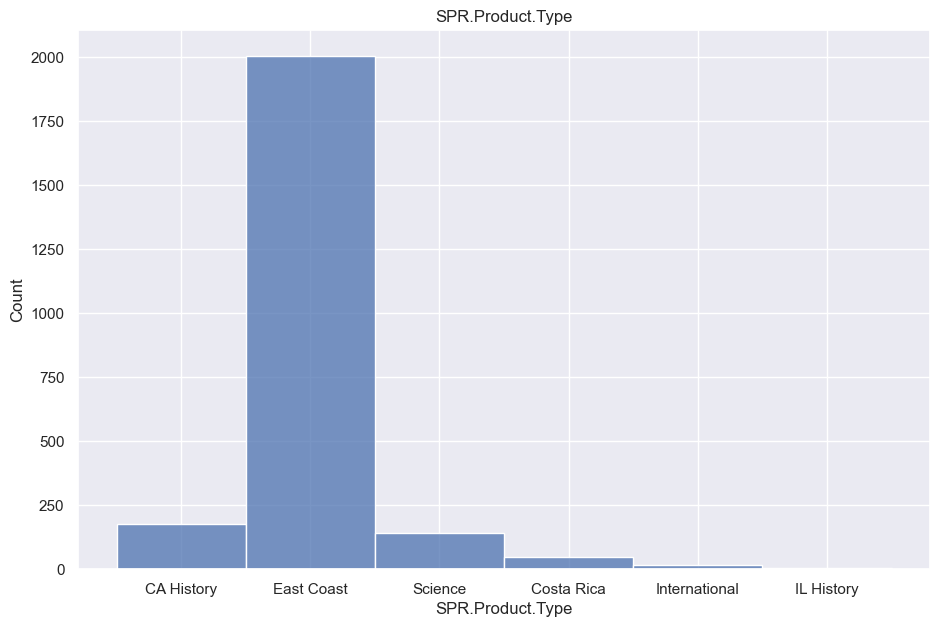

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


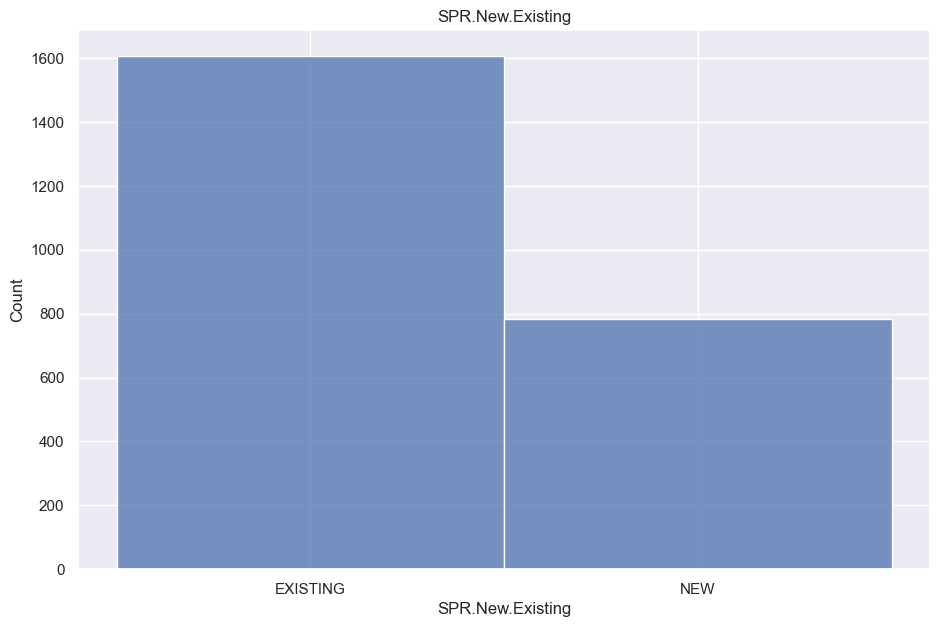

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


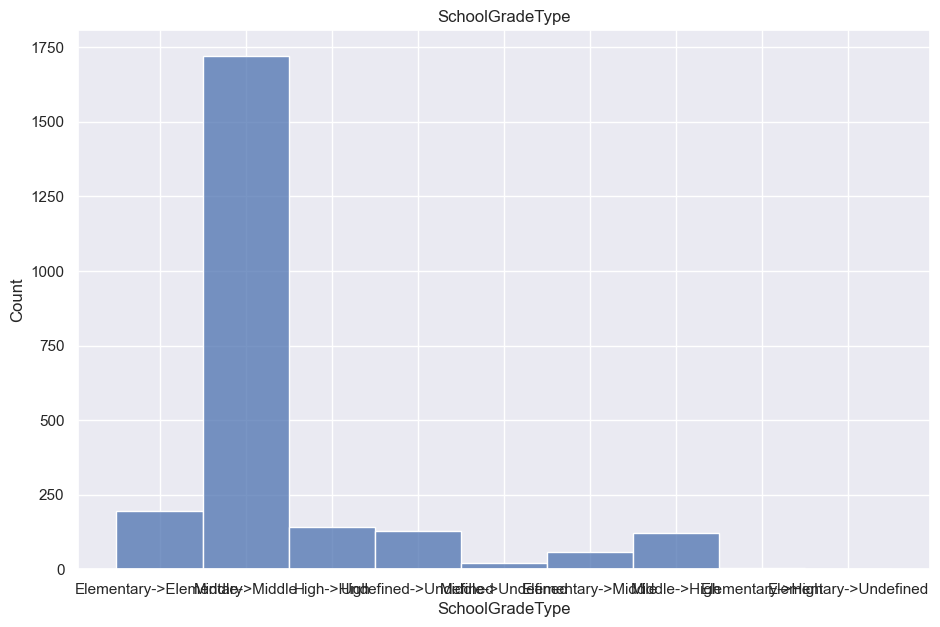

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


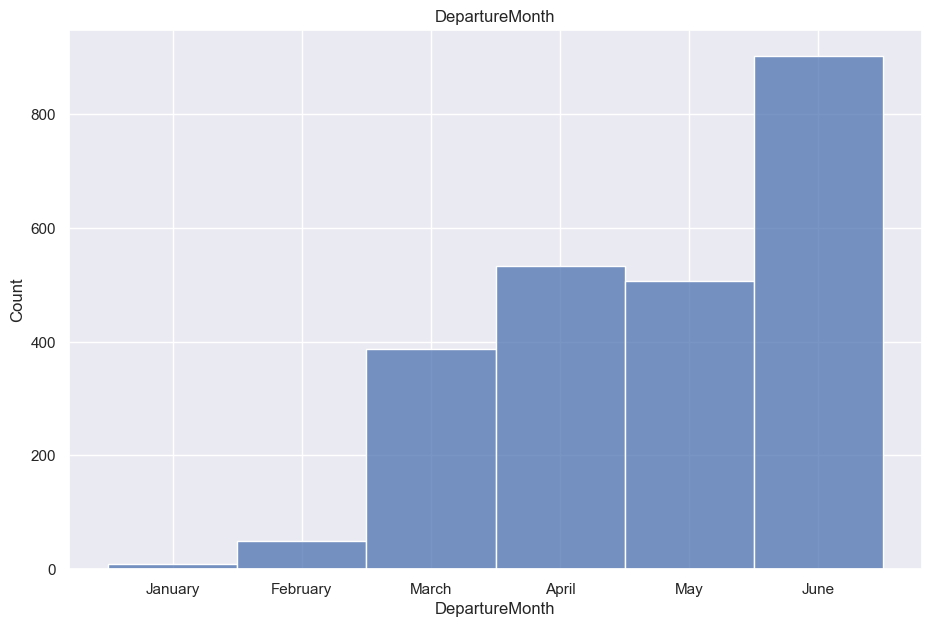

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


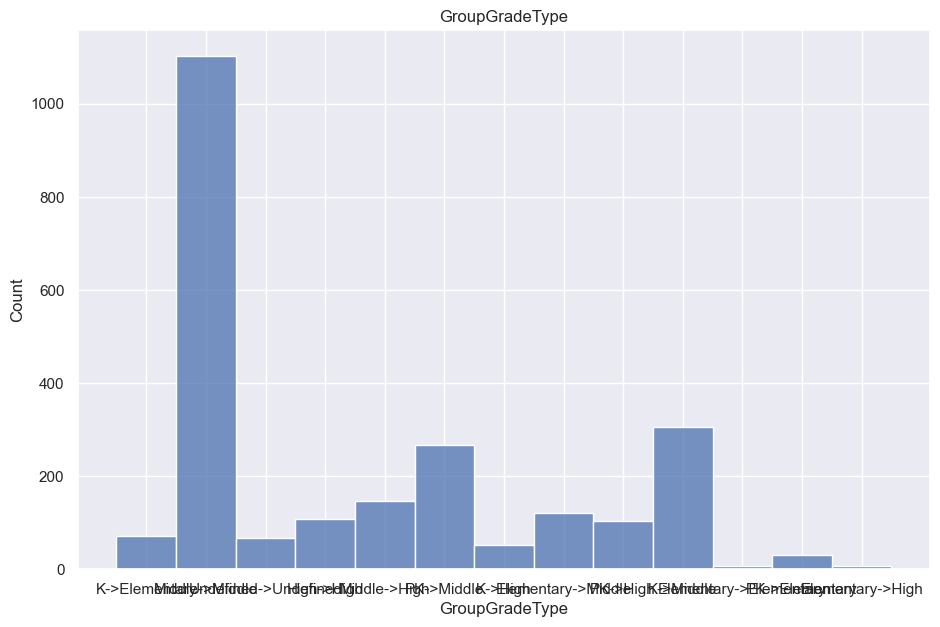

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


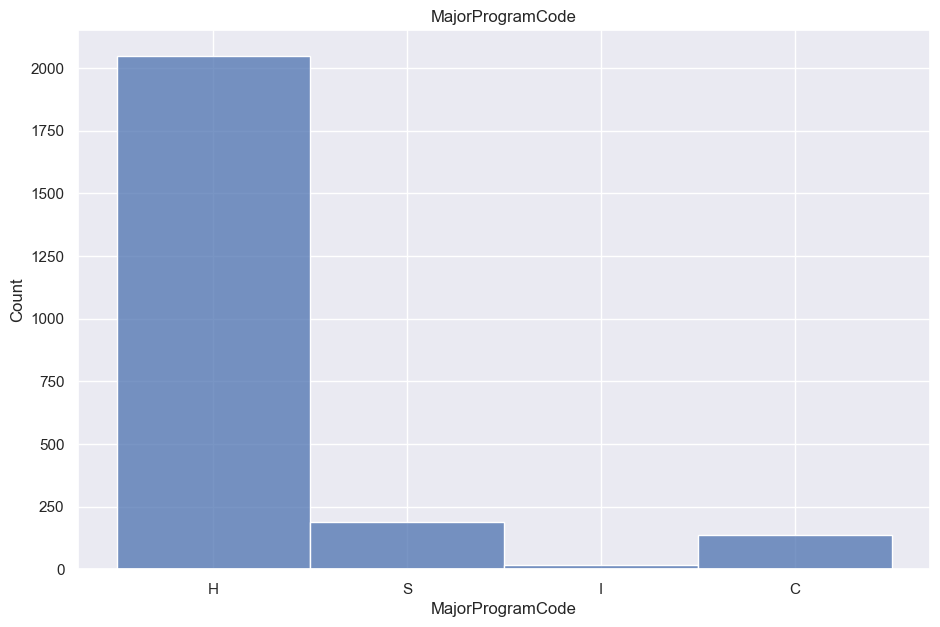

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


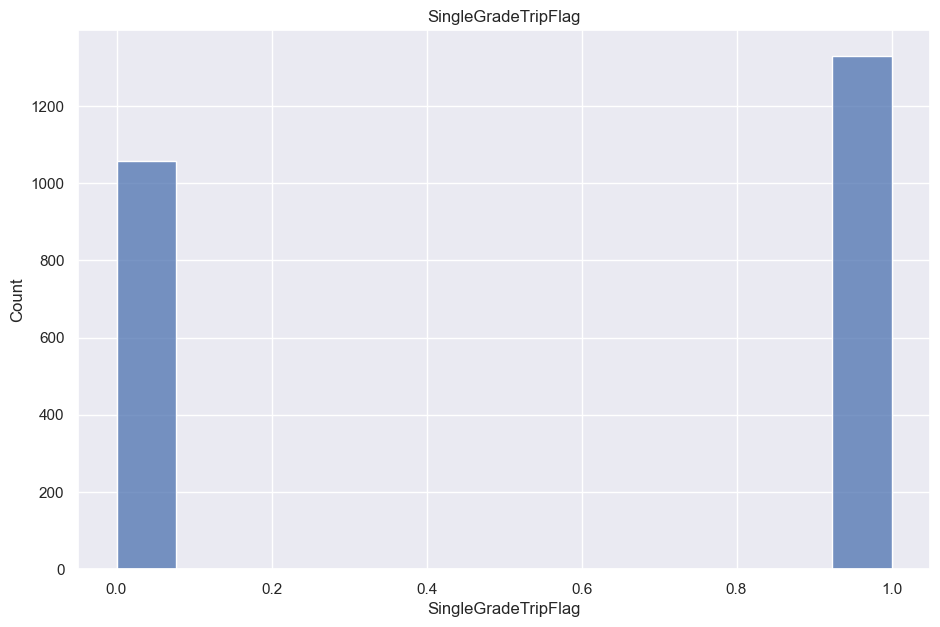

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


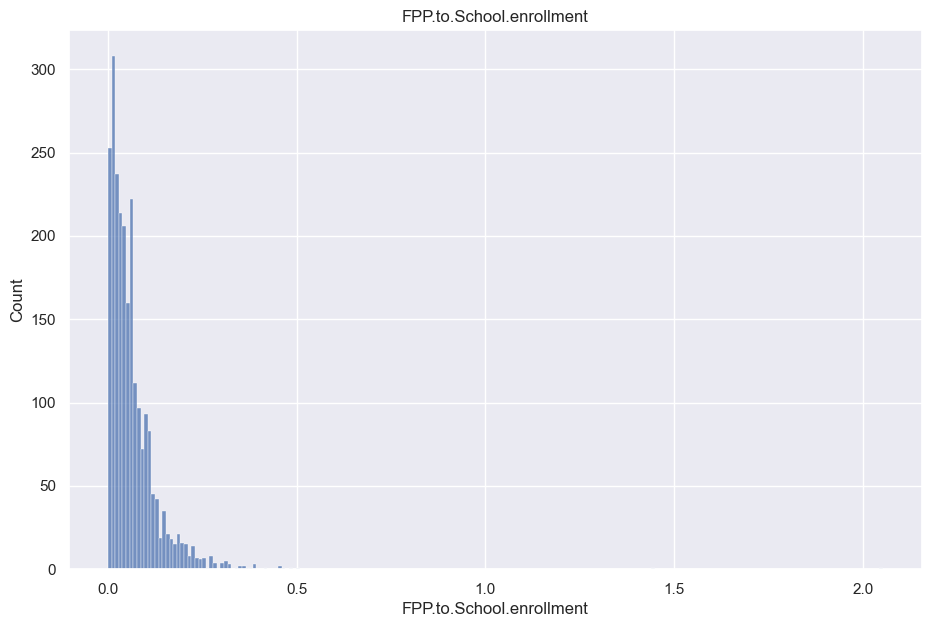

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


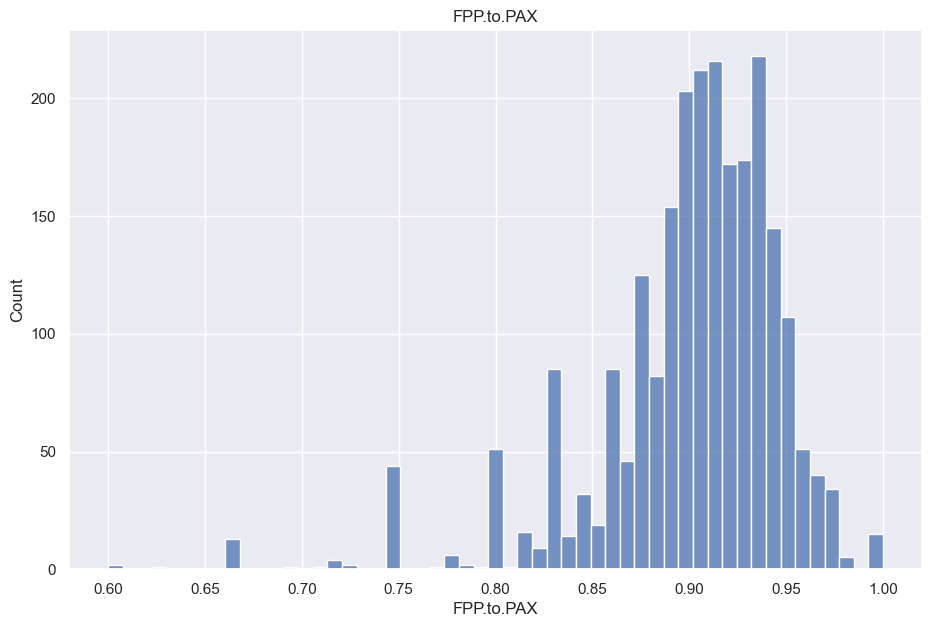

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


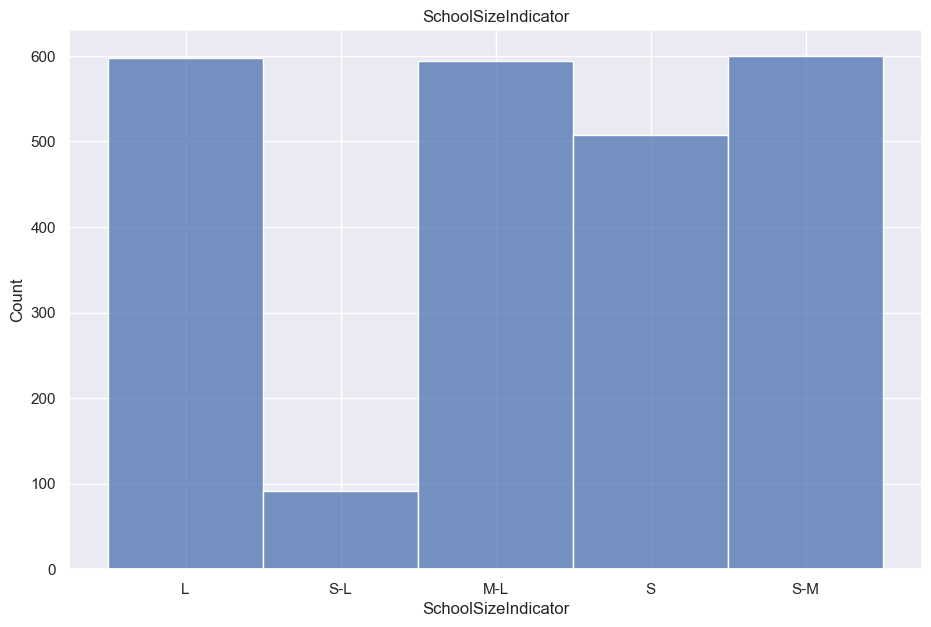

C:\Users\krisp\AppData\Local\Temp\ipykernel_16408\3330576936.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[n], palette="CMRmap")


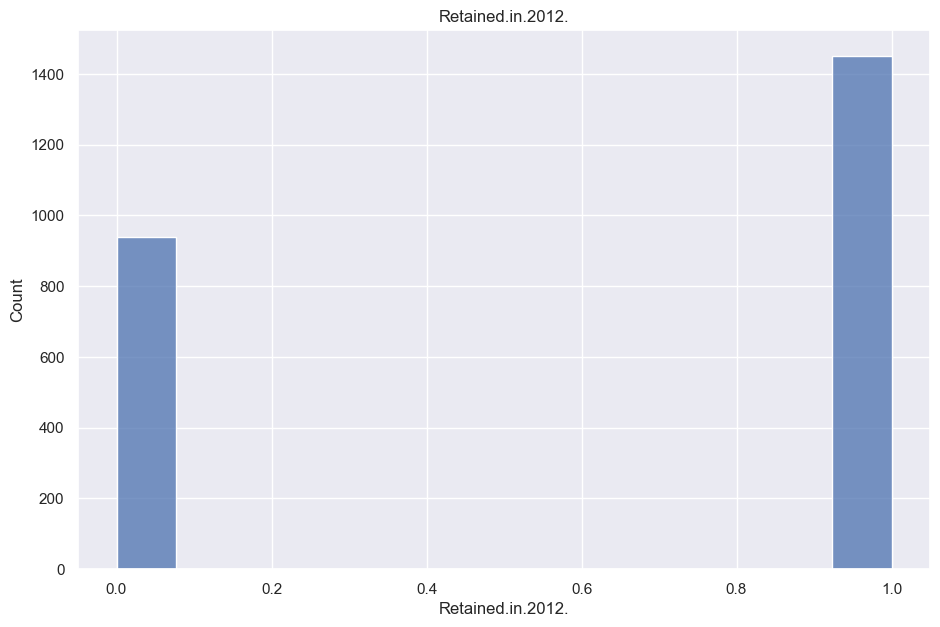

In [79]:
for n in df:
  sns.set(font_scale=1)
  plt.figure(figsize=(11,7))
  sns.histplot(df[n], palette="CMRmap")
  
  plt.title(f'{df[n].name}')
  plt.show()

<AxesSubplot:xlabel='School.Sponsor', ylabel='FPP.to.School.enrollment'>

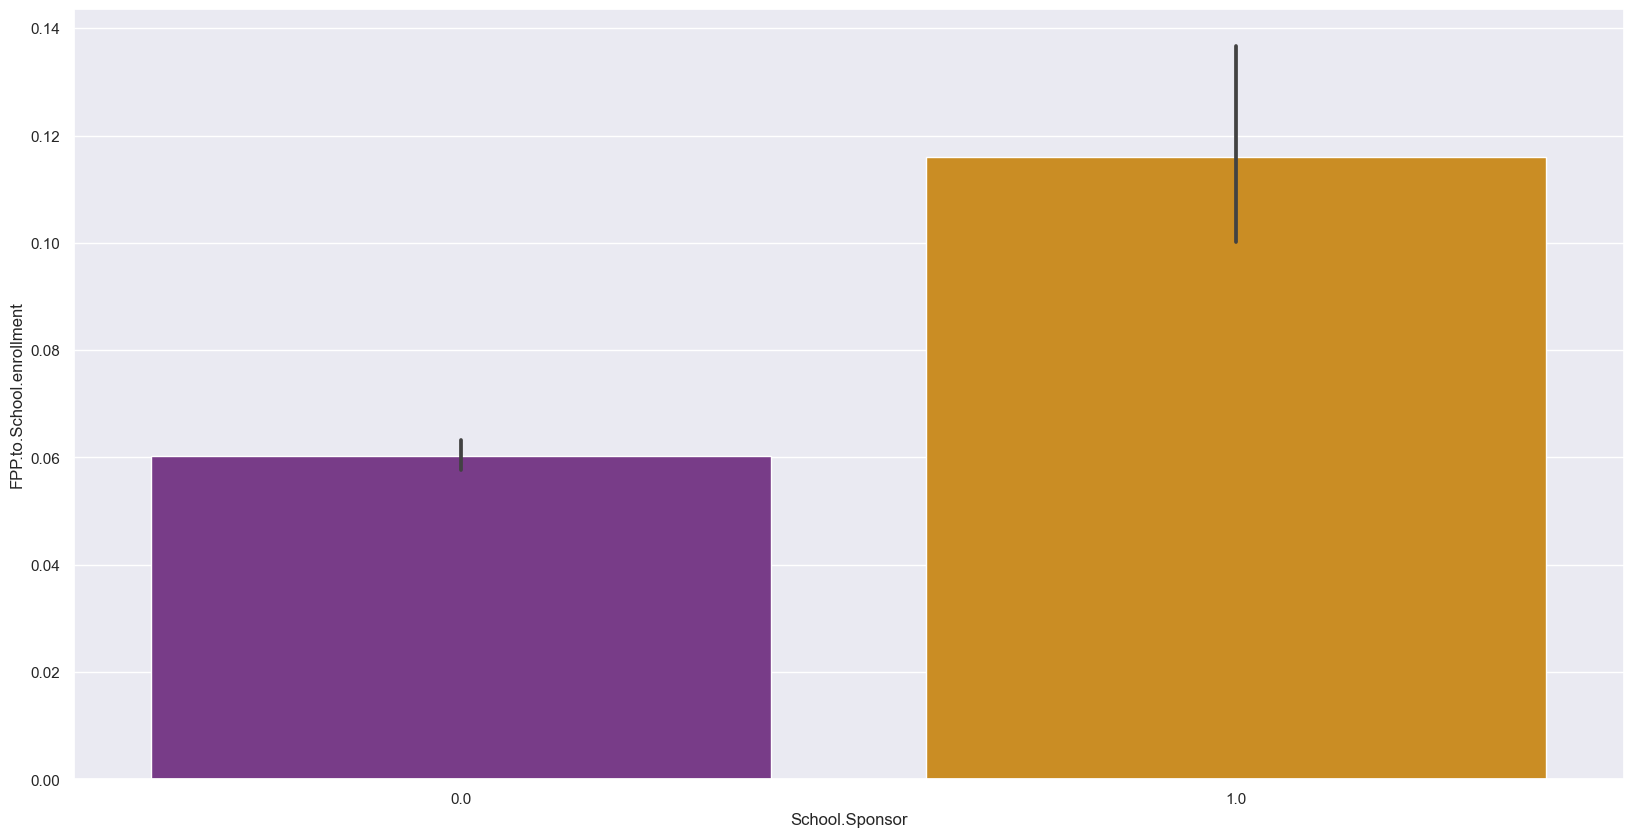

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(y=df['FPP.to.School.enrollment'],x=df['School.Sponsor'],data=df, palette="CMRmap")

<AxesSubplot:xlabel='SingleGradeTripFlag', ylabel='Retained.in.2012.'>

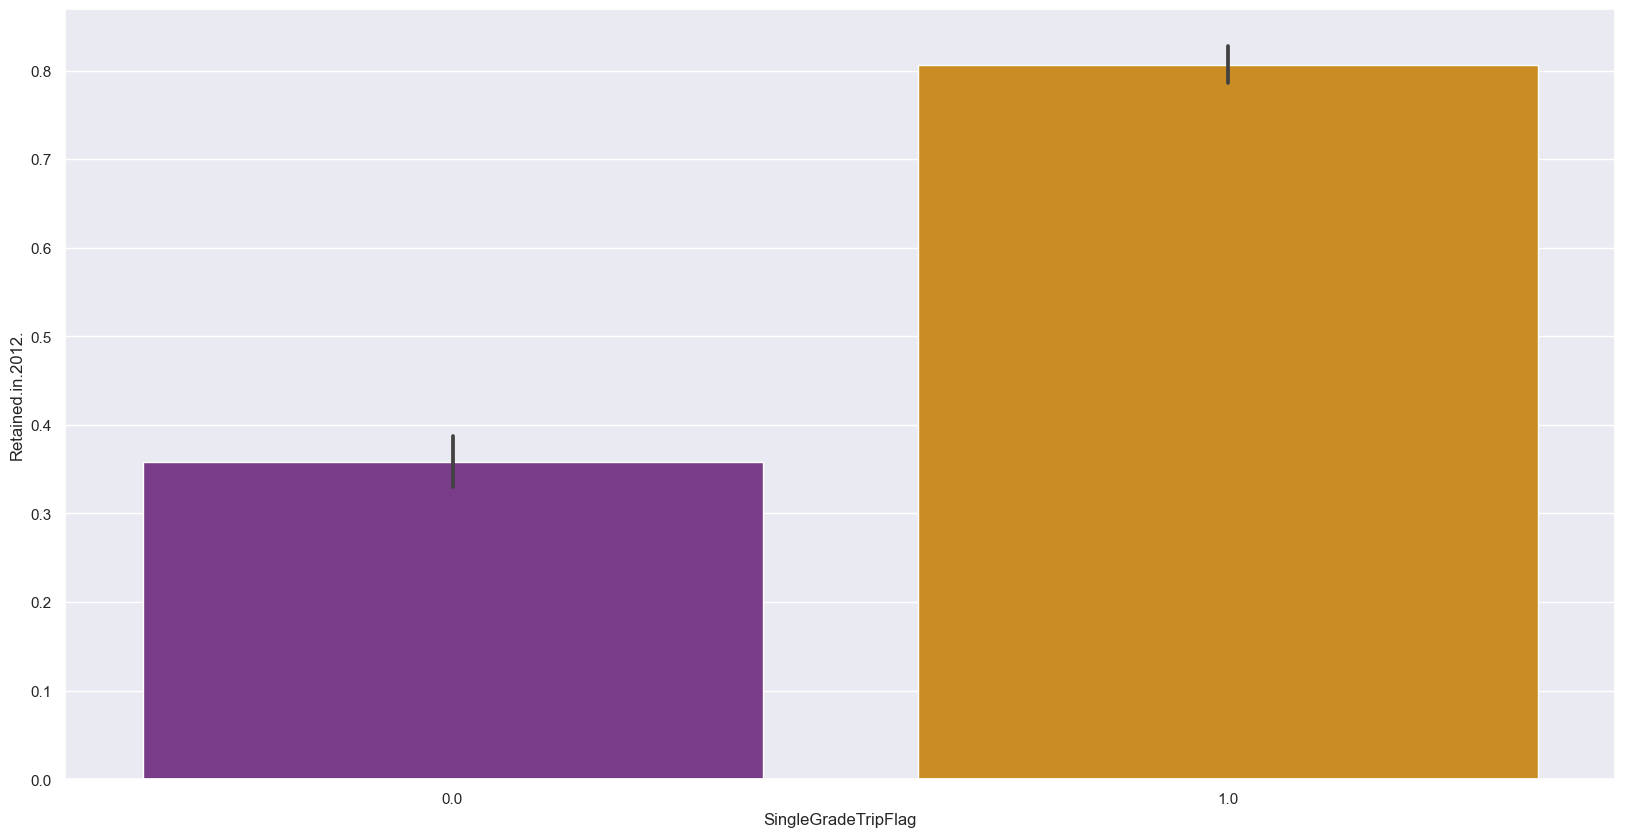

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(y=df['Retained.in.2012.'],x=df['SingleGradeTripFlag'],data=df, palette="CMRmap")

Below many columns below has been coverted into category type of data because in Logistic regression input variable of categorical type is used

In [83]:
category_columns = [
       'Program.Code', 'Group.State',
       'Travel.Type', 'Poverty.Code', 'Region', 
       'CRM.Segment', 'School.Type', 'Income.Level',
       'SPR.Product.Type', 'SPR.New.Existing', 'SchoolGradeType', 
       'DepartureMonth','GroupGradeType', 'MajorProgramCode', 'SchoolSizeIndicator']

In [84]:
 
for i in category_columns:
    xx=sklearn.preprocessing.LabelEncoder()
    df[i]=xx.fit_transform(df[i])

In [85]:
for c in category_columns:
  df[c] = df[c].astype('category')
  print(df[c].name, df[c].dtype.name)

Program.Code category
Group.State category
Travel.Type category
Poverty.Code category
Region category
CRM.Segment category
School.Type category
Income.Level category
SPR.Product.Type category
SPR.New.Existing category
SchoolGradeType category
DepartureMonth category
GroupGradeType category
MajorProgramCode category
SchoolSizeIndicator category


In [86]:
category_columns_2=['From.Grade','Is.Non.Annual.','Parent.Meeting.Flag','School.Sponsor','SingleGradeTripFlag']

In [87]:
for c in category_columns_2:
  df[c] = df[c].astype('category')
  print(df[c].name, df[c].dtype.name)

From.Grade category
Is.Non.Annual. category
Parent.Meeting.Flag category
School.Sponsor category
SingleGradeTripFlag category


In [88]:
df['MDR.Low.Grade']=df['MDR.Low.Grade'].astype('float')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Program.Code              2389 non-null   category
 1   From.Grade                2389 non-null   category
 2   Group.State               2389 non-null   category
 3   Is.Non.Annual.            2389 non-null   category
 4   Days                      2389 non-null   float64 
 5   Travel.Type               2389 non-null   category
 6   FRP.Active                2389 non-null   float64 
 7   FRP.Cancelled             2389 non-null   float64 
 8   FRP.Take.up.percent.      2389 non-null   float64 
 9   Poverty.Code              2389 non-null   category
 10  Region                    2389 non-null   category
 11  CRM.Segment               2389 non-null   category
 12  School.Type               2389 non-null   category
 13  Parent.Meeting.Flag       2389 non-null   catego

Copy dataframe ndf is created. This dataframe is in categorical form and will only be used for Logistic regression

In [90]:
ndf = df.copy()

In [91]:
ndf.rename(columns={'Retained.in.2012.': 'Retained_in_2012'}, inplace=True)

In [92]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Program.Code              2389 non-null   category
 1   From.Grade                2389 non-null   category
 2   Group.State               2389 non-null   category
 3   Is.Non.Annual.            2389 non-null   category
 4   Days                      2389 non-null   float64 
 5   Travel.Type               2389 non-null   category
 6   FRP.Active                2389 non-null   float64 
 7   FRP.Cancelled             2389 non-null   float64 
 8   FRP.Take.up.percent.      2389 non-null   float64 
 9   Poverty.Code              2389 non-null   category
 10  Region                    2389 non-null   category
 11  CRM.Segment               2389 non-null   category
 12  School.Type               2389 non-null   category
 13  Parent.Meeting.Flag       2389 non-null   catego

In [93]:
ndf.isnull().sum()

Program.Code                0
From.Grade                  0
Group.State                 0
Is.Non.Annual.              0
Days                        0
Travel.Type                 0
FRP.Active                  0
FRP.Cancelled               0
FRP.Take.up.percent.        0
Poverty.Code                0
Region                      0
CRM.Segment                 0
School.Type                 0
Parent.Meeting.Flag         0
MDR.Low.Grade               0
MDR.High.Grade              0
Total.School.Enrollment     0
Income.Level                0
EZ.Pay.Take.Up.Rate         0
School.Sponsor              0
SPR.Product.Type            0
SPR.New.Existing            0
SchoolGradeType             0
DepartureMonth              0
GroupGradeType              0
MajorProgramCode            0
SingleGradeTripFlag         0
FPP.to.School.enrollment    0
FPP.to.PAX                  0
SchoolSizeIndicator         0
Retained_in_2012            0
dtype: int64

In [94]:
ndf['Retained_in_2012']=ndf['Retained_in_2012'].astype(float).astype(int)

In ndf dataframe some of the columns(Days, Total school enrollment, FRP Active, FRP Cancelled) have been grouped to increase the model accuracy 

In [95]:
label_encoder = sklearn.preprocessing.LabelEncoder()
conditions = [
    ndf['Days'].lt(5),
    ndf['Days'].gt(5)
]
choices=['less_than_five_days','more_than_five_days']
ndf['Days'] = np.select(conditions,choices)
ndf['Days']=ndf['Days'].astype('category')
ndf['Days'] = label_encoder.fit_transform(ndf['Days'])
#2
conditions = [
    ndf['Total.School.Enrollment'].lt(450),
    ndf['Total.School.Enrollment'].gt(450)
]
choices=['less_than_450_schools','more_than_450_schools']
ndf['Total.School.Enrollment'] = np.select(conditions,choices)
ndf['Total.School.Enrollment']=ndf['Total.School.Enrollment'].astype('category')
ndf['Total.School.Enrollment'] = label_encoder.fit_transform(ndf['Total.School.Enrollment'])
#3
conditions = [
    ndf['FRP.Active'].lt(40),
    ndf['FRP.Active'].gt(40)
]
choices=['less_than_40','more_than_40']
ndf['FRP.Active'] = np.select(conditions,choices)
ndf['FRP.Active']=ndf['FRP.Active'].astype('category')
ndf['FRP.Active'] = label_encoder.fit_transform(ndf['FRP.Active'])
#4
conditions = [
    ndf['FRP.Cancelled'].lt(7),
    ndf['FRP.Cancelled'].gt(7)
]
choices=['less_than_7','more_than_7']
ndf['FRP.Cancelled'] = np.select(conditions,choices)
ndf['FRP.Cancelled']=ndf['FRP.Cancelled'].astype('category')
ndf['FRP.Cancelled'] = label_encoder.fit_transform(ndf['FRP.Cancelled'])

Copy dataframe mdf is created from ndf. MinMaxScaler will be used in this dataframe and will be used in KNN, Decision Tree and Random Forest modelling

In [96]:
mdf= ndf.copy()

In [97]:
from sklearn.preprocessing import MinMaxScaler
 
mmscaler = MinMaxScaler()
cols = ['Program.Code', 'From.Grade', 'Group.State', 'Is.Non.Annual.', 'Days',
       'Travel.Type', 'FRP.Take.up.percent.', 'Poverty.Code', 'Region',
       'CRM.Segment', 'School.Type', 'Total.School.Enrollment', 'Income.Level',
       'EZ.Pay.Take.Up.Rate', 'School.Sponsor', 'SPR.Product.Type',
       'SPR.New.Existing', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeType', 'MajorProgramCode', 'SingleGradeTripFlag',
       'FPP.to.School.enrollment', 'FPP.to.PAX', 'SchoolSizeIndicator','Retained_in_2012']
mdf[cols] = mmscaler.fit_transform(mdf[cols])
mdf['Retained_in_2012']=mdf['Retained_in_2012'].astype(float).astype(int)

In [98]:
mdf

Program.Code  From.Grade  Group.State  Is.Non.Annual.  Days  \
0         0.518519    0.111111     0.113208             0.0   0.5   
1         0.185185    0.555556     0.075472             0.0   1.0   
2         0.222222    0.555556     0.188679             0.0   0.5   
3         0.407407    0.666667     0.905660             1.0   0.5   
4         0.222222    0.333333     0.188679             0.0   1.0   
...            ...         ...          ...             ...   ...   
2384      0.185185    0.444444     0.113208             0.0   0.0   
2385      0.222222    0.555556     0.113208             0.0   0.0   
2386      0.222222    0.777778     0.113208             0.0   1.0   
2387      0.518519    0.111111     0.113208             0.0   0.5   
2388      0.222222    0.555556     0.943396             0.0   1.0   

      Travel.Type  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  \
0        0.000000           1              1                 0.424   
1        0.000000           1              2                 0.409   
2        0.000000           1              1                 0.708   
3        0.333333           1              1                 0.000   
4        1.000000           0              2                 0.494   
...           ...         ...            ...                   ...   
2384     0.000000           1              1                 0.514   
2385     0.000000           1              1                 0.800   
2386     0.000000           1              1                 0.000   
2387     0.000000           1              1                 0.188   
2388     0.000000           1              2                 0.652   

      Poverty.Code  ...  SPR.New.Existing  SchoolGradeType  DepartureMonth  \
0              0.2  ...               0.0             0.00             0.4   
1              0.4  ...               0.0             0.75             0.4   
2              0.4  ...               0.0             0.75             0.4   
3              1.0  ...               0.0             0.50             0.4   
4              0.6  ...               0.0             0.75             0.4   
...            ...  ...               ...              ...             ...   
2384           0.4  ...               0.0             0.75             0.6   
2385           0.4  ...               0.0             0.75             0.6   
2386           1.0  ...               1.0             0.50             0.6   
2387           1.0  ...               1.0             0.00             0.6   
2388           0.2  ...               0.0             0.75             0.6   

     GroupGradeType  MajorProgramCode  SingleGradeTripFlag  \
0          0.333333          0.333333                  1.0   
1          0.666667          0.333333                  1.0   
2          0.666667          0.333333                  1.0   
3          1.000000          0.333333                  0.0   
4          0.666667          0.333333                  0.0   
...             ...               ...                  ...   
2384       0.666667          0.333333                  0.0   
2385       0.500000          0.333333                  1.0   
2386       1.000000          0.333333                  0.0   
2387       1.000000          0.333333                  1.0   
2388       0.666667          0.333333                  1.0   

      FPP.to.School.enrollment  FPP.to.PAX  SchoolSizeIndicator  \
0                     0.030572    0.841270                 0.00   
1                     0.012166    0.700000                 0.00   
2                     0.011799    0.722222                 0.00   
3                     0.031809    1.000000                 0.75   
4                     0.054383    0.775281                 0.25   
...                        ...         ...                  ...   
2384                  0.008802    0.802632                 0.00   
2385                  0.016504    0.772727                 1.00   
2386                  0.031809    0.705882         

In [99]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Program.Code              2389 non-null   float64 
 1   From.Grade                2389 non-null   float64 
 2   Group.State               2389 non-null   float64 
 3   Is.Non.Annual.            2389 non-null   float64 
 4   Days                      2389 non-null   float64 
 5   Travel.Type               2389 non-null   float64 
 6   FRP.Active                2389 non-null   int32   
 7   FRP.Cancelled             2389 non-null   int32   
 8   FRP.Take.up.percent.      2389 non-null   float64 
 9   Poverty.Code              2389 non-null   float64 
 10  Region                    2389 non-null   float64 
 11  CRM.Segment               2389 non-null   float64 
 12  School.Type               2389 non-null   float64 
 13  Parent.Meeting.Flag       2389 non-null   catego

# Modelling

## KNN MODEL 

In [100]:
ndf.Retained_in_2012.value_counts()

1    1451
0     938
Name: Retained_in_2012, dtype: int64

In [101]:
mdf.Retained_in_2012.value_counts()

1    1451
0     938
Name: Retained_in_2012, dtype: int64

In [102]:
X = ndf.drop(columns=['Retained_in_2012'], axis=1)
y = ndf.iloc[:, -1].values
mX = mdf.drop(columns=['Retained_in_2012'], axis=1)
my = mdf.iloc[:, -1].values

In [103]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0  938]
 [   1 1451]]


In [104]:
np.shape(X)

(2389, 30)

In [105]:
unique, counts = np.unique(my, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0  938]
 [   1 1451]]


In [106]:
np.shape(mX)

(2389, 30)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=380)

In [109]:
mX_train, mX_test, my_train, my_test = train_test_split(mX, my, test_size=0.3, random_state=380)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(mX_train, my_train)

KNeighborsClassifier(n_neighbors=8)

In [111]:
from sklearn import metrics

In [112]:
my_pred = clf.predict(mX_test)
print(metrics.classification_report(my_test, my_pred))
print(confusion_matrix(my_test, my_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       301
           1       0.79      0.85      0.82       416

    accuracy                           0.78       717
   macro avg       0.78      0.77      0.77       717
weighted avg       0.78      0.78      0.78       717

[[207  94]
 [ 64 352]]


In [113]:
clf.score(mX_train, my_train)

0.8098086124401914

In [114]:
clf.score(mX_test, my_test)

0.7796373779637378

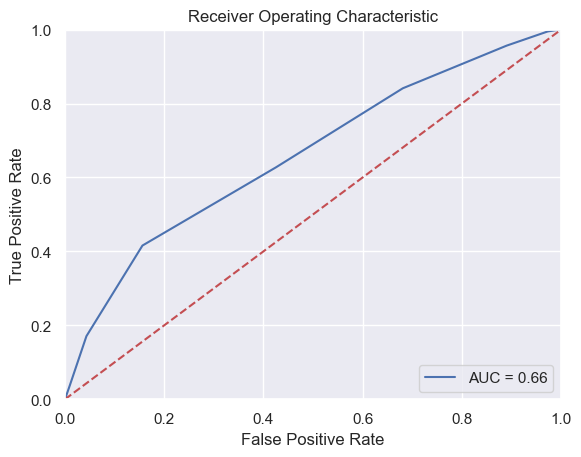

In [115]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       301
           1       0.79      0.88      0.83       416

    accuracy                           0.79       717
   macro avg       0.80      0.78      0.78       717
weighted avg       0.80      0.79      0.79       717

[[202  99]
 [ 48 368]]


C:\Users\krisp\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 427.9555555555555, 'Predicted label')

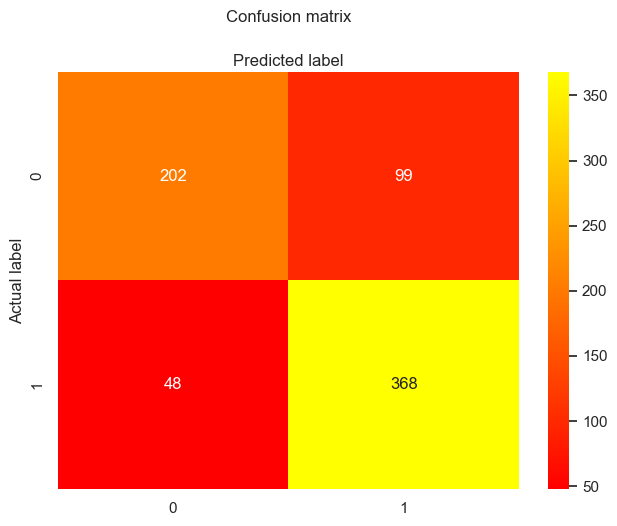

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



#For plotting confusion metrix
confusionn_matrix = metrics.confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
t_marks = np.arange(len(class_names))
plt.xticks(t_marks, class_names)
plt.yticks(t_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusionn_matrix), annot=True, cmap="autumn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [117]:
clf.score(X_train, y_train)

0.8092105263157895

In [118]:
clf.score(X_test, y_test)

0.7949790794979079

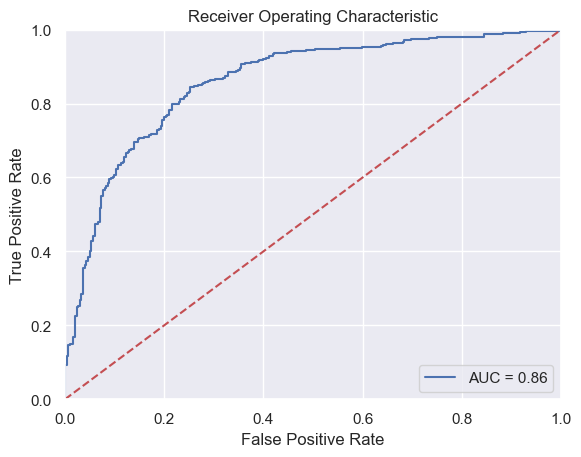

In [119]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
print('intercept ', clf.intercept_[0])
print('classes', clf.classes_)

intercept  -0.46935810398958777
classes [0 1]


In [121]:
log_odds = np.exp(clf.coef_[0])
pd.DataFrame(log_odds,
            X_train.columns,
            columns=['coef']).sort_values(by='coef',ascending=False)


coef
SingleGradeTripFlag       3.145741
School.Sponsor            1.640722
Travel.Type               1.466980
Total.School.Enrollment   1.304313
FRP.Take.up.percent.      1.235995
FRP.Active                1.229432
Days                      1.226948
Parent.Meeting.Flag       1.189468
FPP.to.School.enrollment  1.176794
SchoolGradeType           1.164648
School.Type               1.115324
Poverty.Code              1.048598
SchoolSizeIndicator       1.046358
SPR.Product.Type          1.043347
EZ.Pay.Take.Up.Rate       1.041627
Income.Level              1.028073
CRM.Segment               1.024712
DepartureMonth            1.021861
MDR.Low.Grade             1.019790
GroupGradeType            1.019483
Group.State               0.994920
Program.Code              0.992842
FRP.Cancelled             0.991349
Region                    0.975660
FPP.to.PAX                0.969249
MDR.High.Grade            0.931501
From.Grade                0.899761
MajorProgramCode          0.776281
SPR.New.Existing          0.211710
Is.Non.Annual.            0.098502

# Decision Tree

              precision    recall  f1-score   support

           0       0.81      0.65      0.73       301
           1       0.78      0.89      0.83       416

    accuracy                           0.79       717
   macro avg       0.80      0.77      0.78       717
weighted avg       0.79      0.79      0.79       717

[[197 104]
 [ 45 371]]


Text(0.5, 427.9555555555555, 'Predicted label')

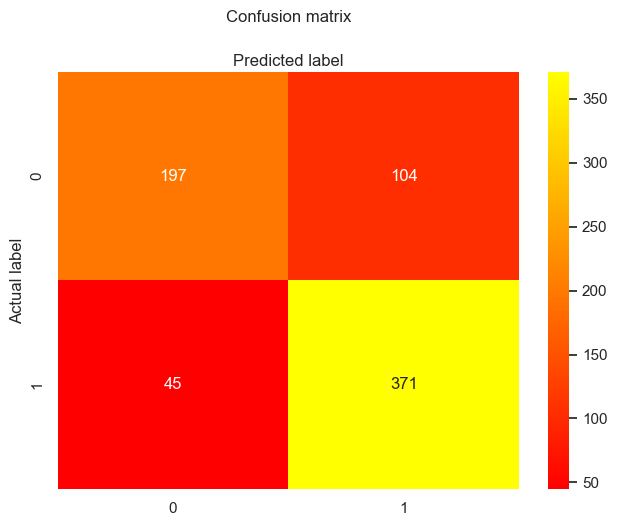

In [122]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 4,criterion = 'gini')
clf = clf.fit(mX_train, my_train)
my_pred = clf.predict(mX_test)
print(metrics.classification_report(my_test, my_pred))
print(confusion_matrix(my_test, my_pred))

#confusion metrics for decisison tree

cnf_matrix_Decisiontree = metrics.confusion_matrix(my_test, my_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
t_marks = np.arange(len(class_names))
plt.xticks(t_marks, class_names)
plt.yticks(t_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_Decisiontree), annot=True, cmap="autumn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

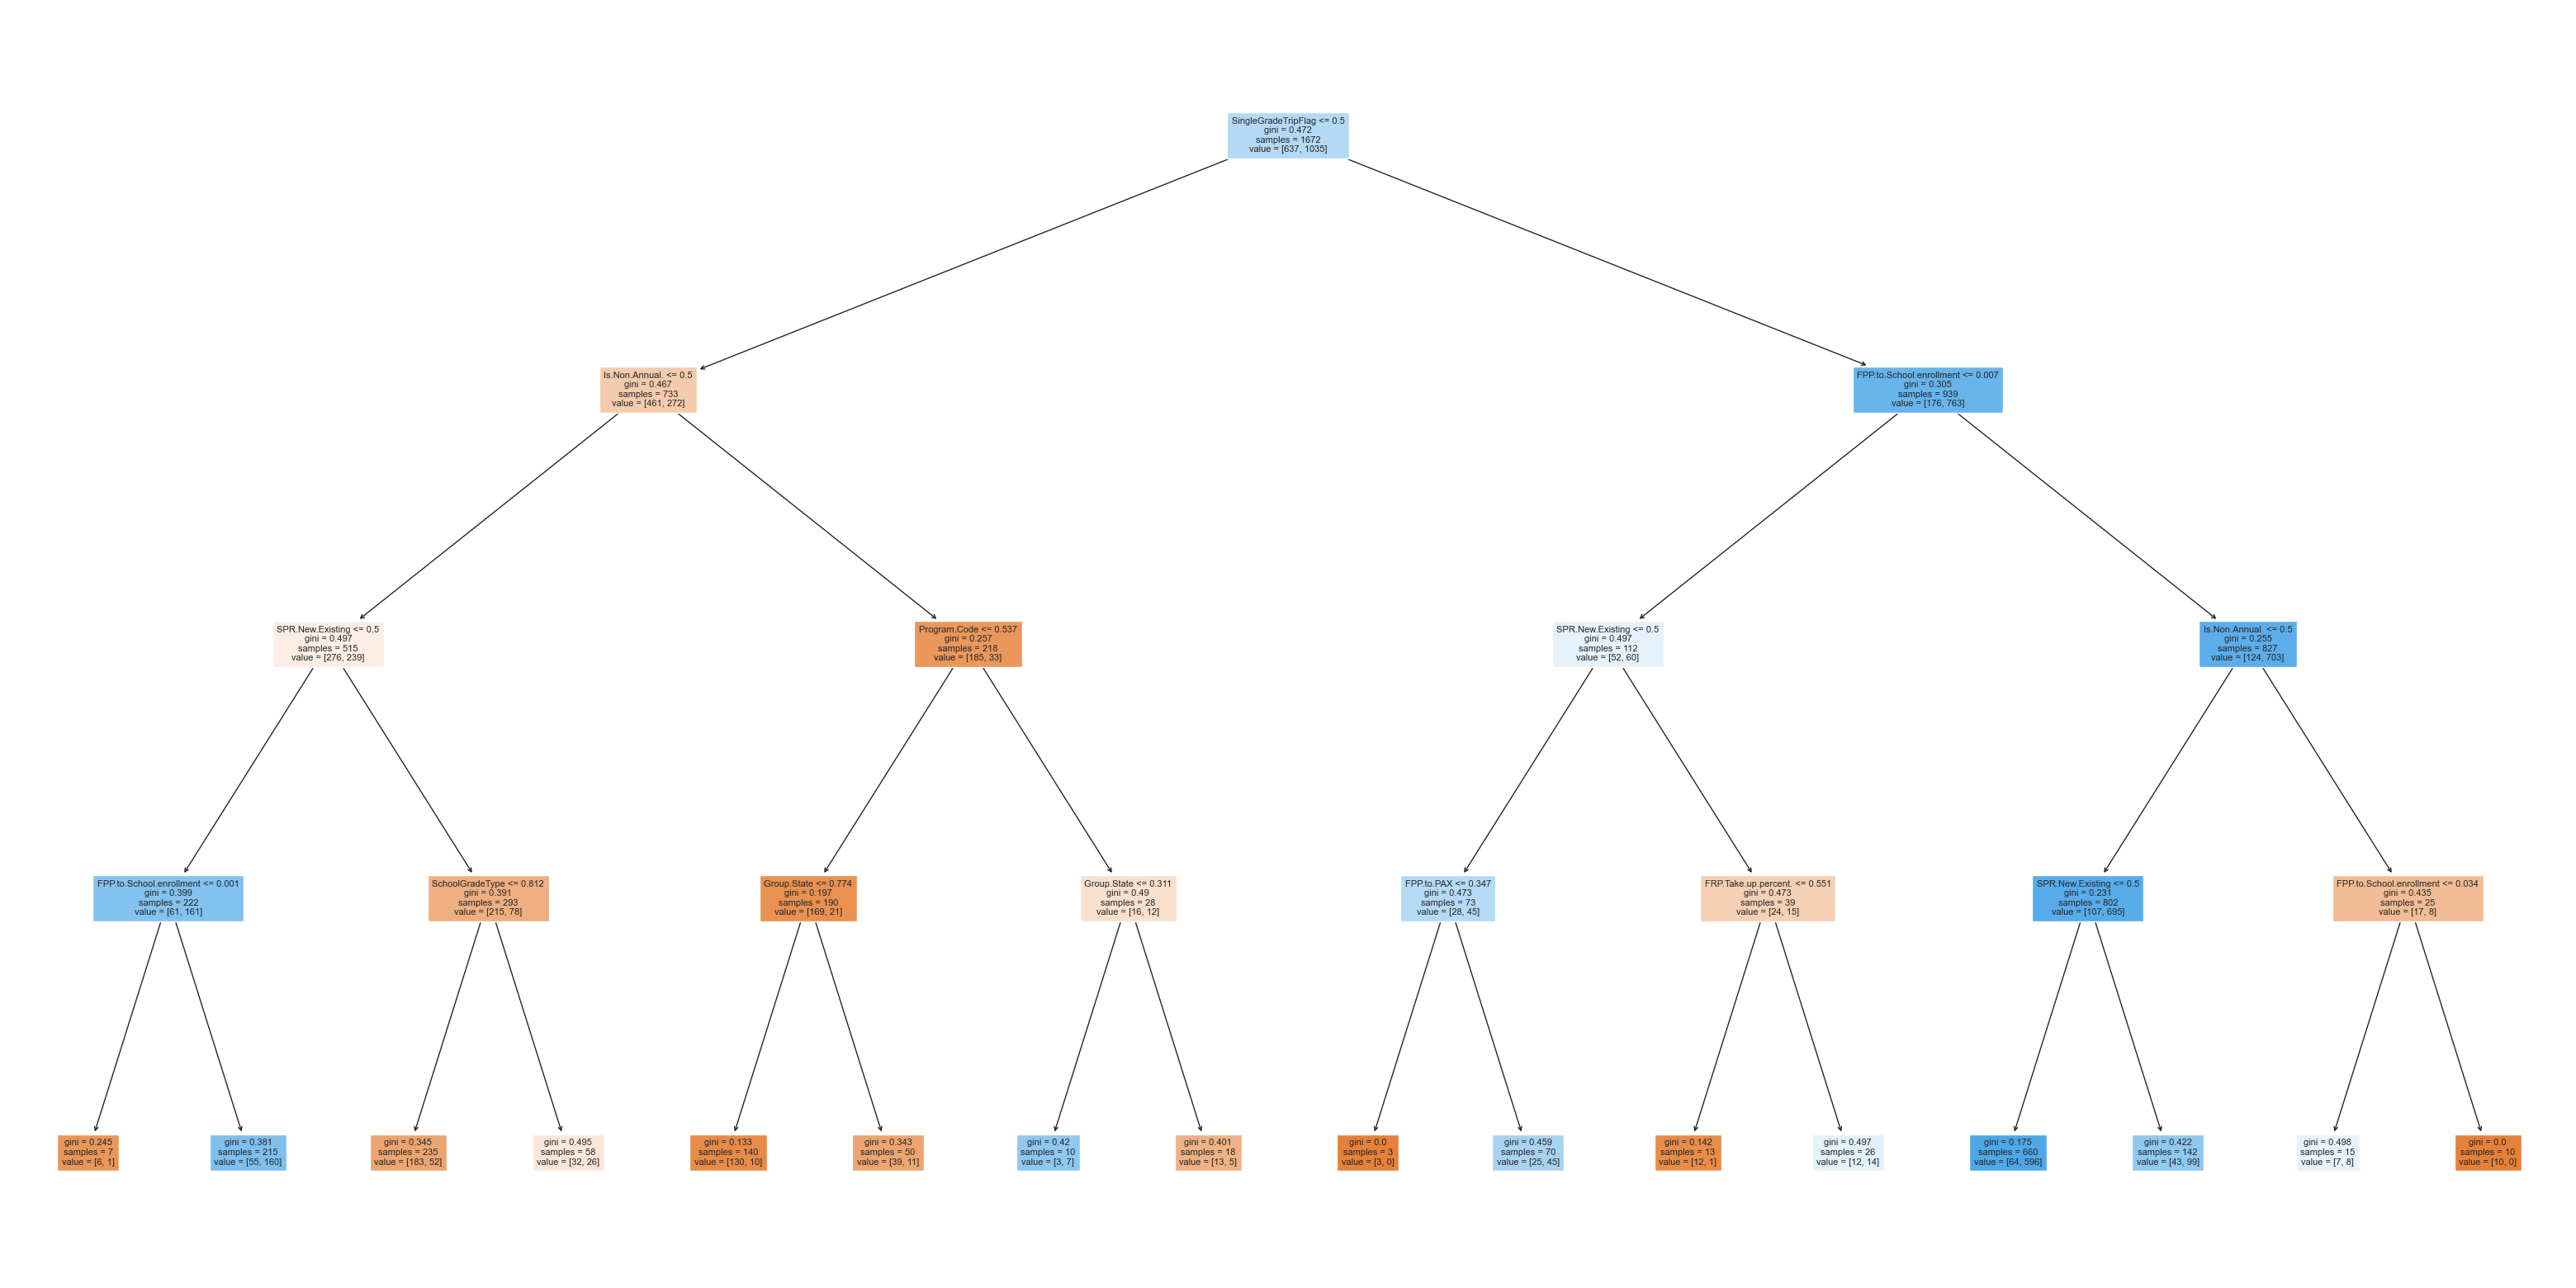

In [123]:
plt.figure(figsize=(40,20))
tree_plot = tree.plot_tree(clf, fontsize = 8, feature_names = X_train.columns, filled = True, max_depth = 4)
plt.show()

In [124]:
clf.score(mX_train, my_train)

0.8116028708133971

In [125]:
clf.score(mX_test, my_test)

0.7921896792189679

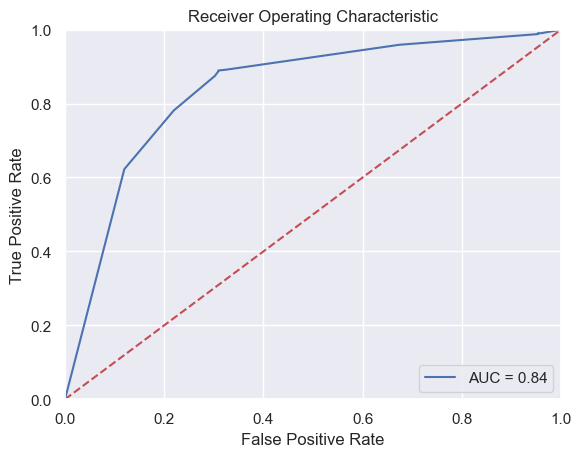

In [126]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RandomForest

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       301
           1       0.77      0.89      0.83       416

    accuracy                           0.78       717
   macro avg       0.79      0.76      0.77       717
weighted avg       0.79      0.78      0.78       717

[[193 108]
 [ 47 369]]


Text(0.5, 427.9555555555555, 'Predicted label')

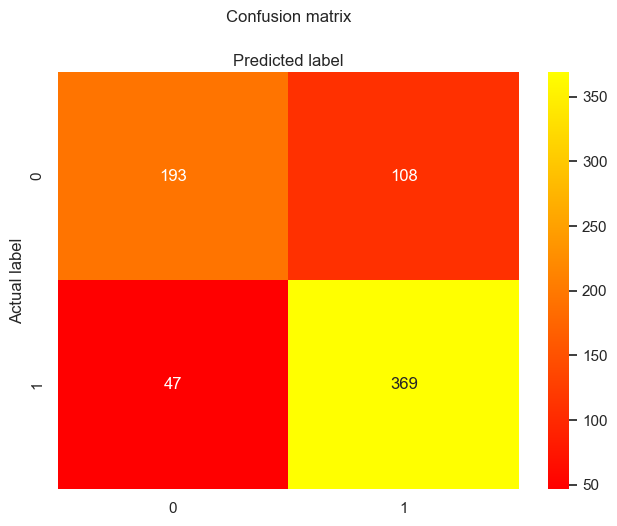

In [127]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 4,criterion = 'gini', n_estimators = 80)
clf = clf.fit(mX_train, my_train)
my_pred = clf.predict(mX_test)
print(metrics.classification_report(my_test, my_pred))
print(confusion_matrix(my_test, my_pred))

cnf_matrix_Randomforest = metrics.confusion_matrix(my_test, my_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
t_marks = np.arange(len(class_names))
plt.xticks(t_marks, class_names)
plt.yticks(t_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_Randomforest), annot=True, cmap="autumn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

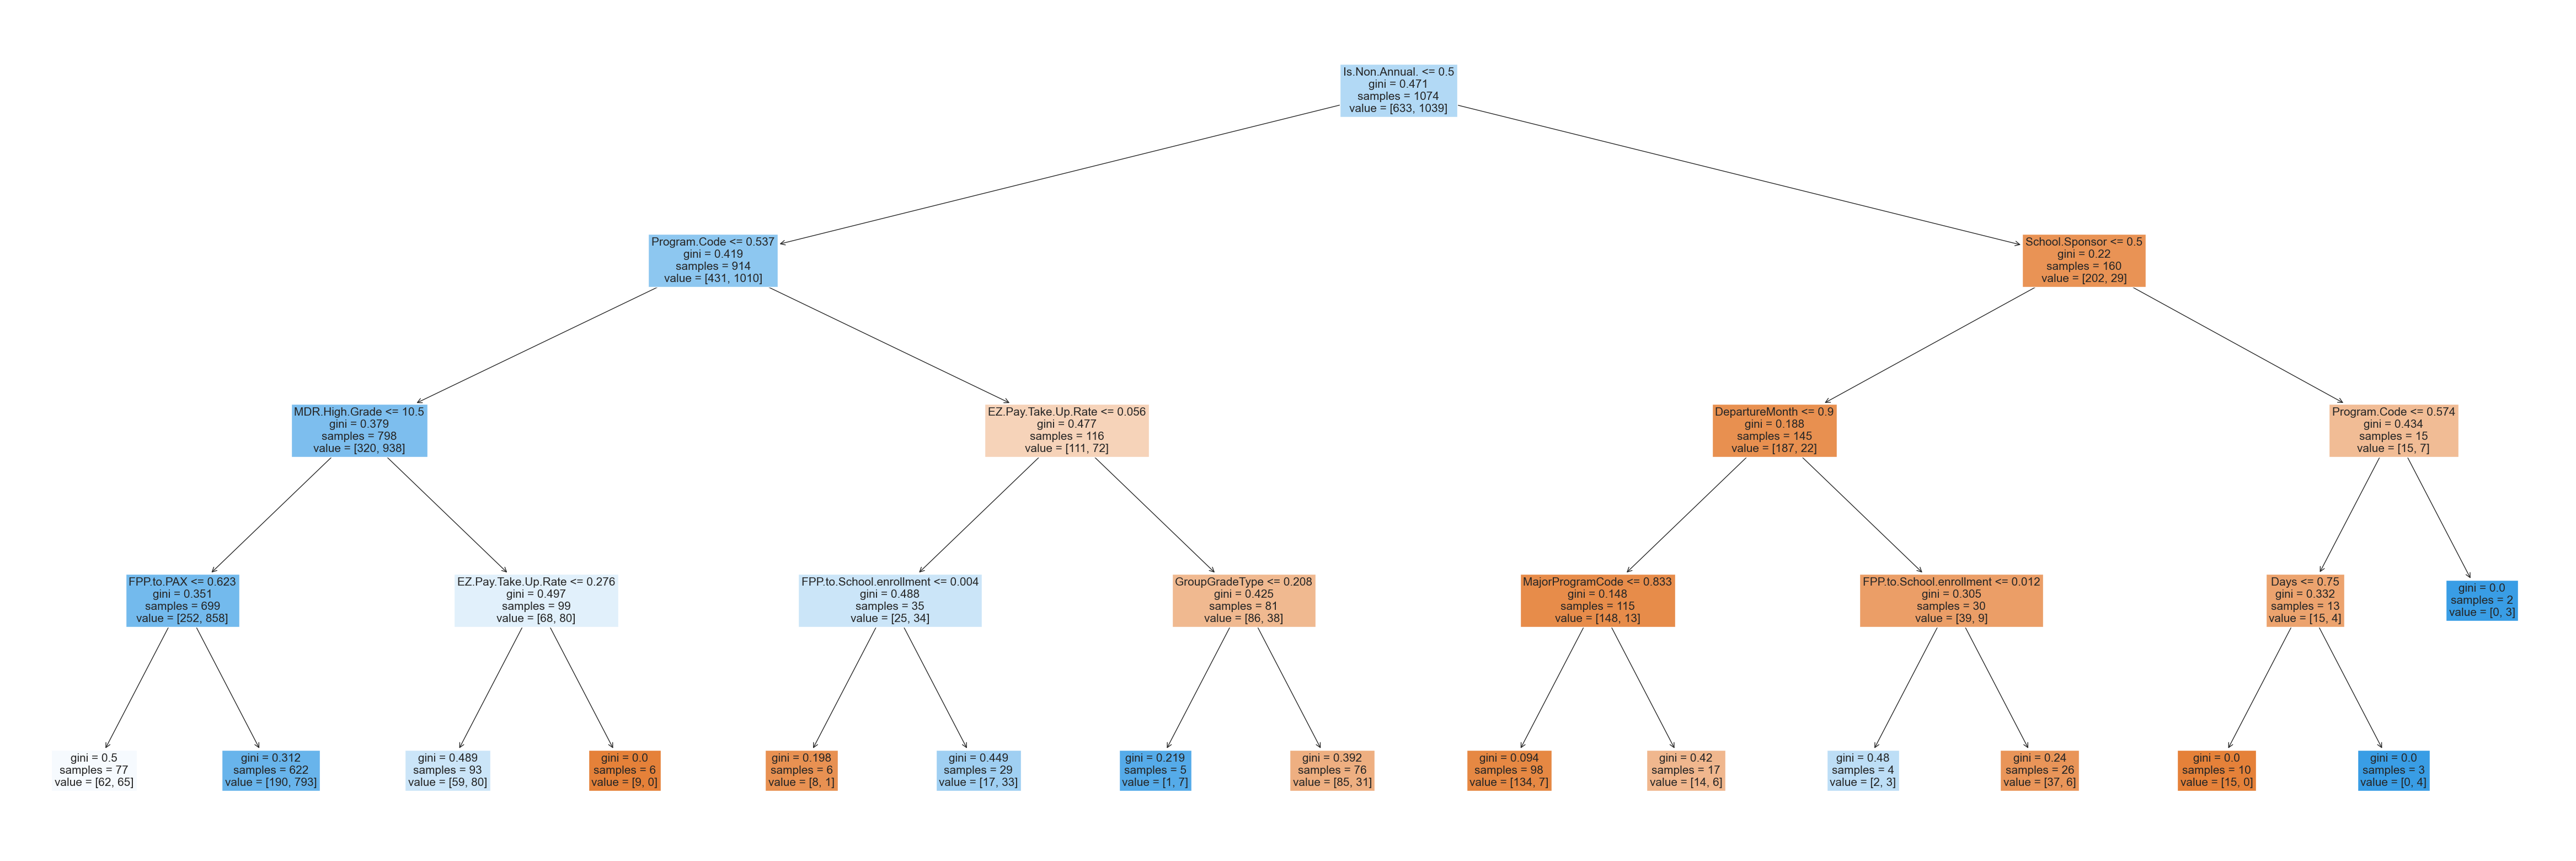

In [128]:
plt.figure(figsize=(60,20))
tree.plot_tree(clf[4],fontsize = 15, feature_names = mX_train.columns,filled = True, max_depth=4) 
plt.show()

In [129]:
clf.score(mX_train, my_train)

0.8145933014354066

In [130]:
clf.score(mX_test, my_test)

0.7838214783821479

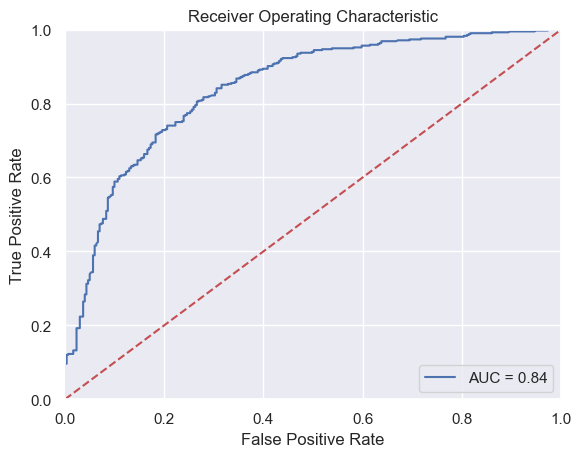

In [131]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()